# Basic Theory

## Introduction to PDEs
An equation or a system of equations of the form
$$
\mathbf{F}=(\mathbf{x},\mathbf{u},\frac{\partial \mathbf{u}}{\partial x_1},...,\frac{\partial \mathbf{u}}{\partial x_n},...,\frac{\partial^p \mathbf{u}}{\partial x_1^p},\frac{\partial^p \mathbf{u}}{\partial x_1^{p-1}\partial x_2},...,\frac{\partial^p \mathbf{u}}{\partial x_n^p})=\mathbf{0}
$$
for an unknown function $\mathbf{u}:D\rightarrow \mathbb{R}^m$, $D\subset \mathbb{R}^n$ is called system of partial differential equations (PDE) for the $m$ functions $u_1(\mathbf{x}),...,u_m(\mathbf{x})$. \
If one of the partial derivatives occurs explicitly and is of $p^{th}$ order ($\frac{\partial^p \mathbf{u}}{\partial^{p_1}x_1 ... \partial^{p_n}x_n}$) then we call the PDE of order $p$. \
The numerical solving methods for PDEs shown in the following are orginially constructed to only solve linear PDEs, i.e. $\mathbf{F}(\mathbf{x},\mathbf{u},...)$ is affine linear in $\mathbf{u},\frac{\partial \mathbf{u}}{\partial x_1},...,\frac{\partial^p \mathbf{u}}{\partial x_n^p}$.
Also any use case we will be looking at is either of first or second order.
Therefore some of the following discussion is restriced to linear PDEs of second order. \
Note: We call $\mathbf{u}$ a solution to the PDE.

### Introduction to Boundary and Initial Value Problems
Since we're only considering linear PDEs we can write $\mathbf{F}=\mathbf{0}$ as $\mathcal{L}\mathbf{u}=\mathbf{f}$, where $\mathcal{L}:\mathbb{R}^m\rightarrow \mathbb{R}^m$ is a differential operator and $\mathbf{f}: D\rightarrow \mathbb{R}^m$ is a given function. \
To solve this problem,
$$
\mathcal{L}\mathbf{u}=\mathbf{f},
$$
uniquely, we need to be given additional information such as a boundary value or initial value. \
Initial value problems (IVP) appear mostly when $\mathbf{x}$ contains a temporal dimension and variable $t$. In this case they can be constructed as
$$
\begin{cases}
  \mathcal{L}\mathbf{u}=\mathbf{f}\qquad & \text{in}\ \mathbb{R}^{n-1}\times(0,\infty), \\
  \mathbf{u}=\mathbf{g} & \text{on}\ \mathbb{R}^{n-1}\times\{t=0\},
\end{cases}
$$
where $\mathbf{g}: \mathbb{R}^{n-1}\times\{t=0\}\rightarrow \mathbb{R}^{m}$ is given initial value function at $t=0$. \
For boundary value problems (BVP) one is interested in finding a solution on a domain $\Omega\subset\mathbb{R}^m$.
There are different types of boundary conditions, most common are Dirichlet and von Neumann boundary conditions. \
Dirichlet problems are constructed as
$$
\begin{cases}
  \mathcal{L}\mathbf{u}=\mathbf{f}\qquad & \text{in}\ \Omega, \\
  \mathbf{u}=\mathbf{g} & \text{on}\ \partial \Omega,
\end{cases}
$$
where $\mathbf{g}: D\rightarrow \mathbb{R}^{m}$ is a given boundary value function. \
Von Neumann problems are constructed as
$$
\begin{cases}
  \mathcal{L}\mathbf{u}=\mathbf{f}\qquad & \text{in}\ \Omega, \\
  \frac{\partial \mathbf{u}}{\partial \mathbf{n}}=\mathbf{g} & \text{on}\ \partial \Omega,
\end{cases}
$$
where $\mathbf{g}: D\rightarrow \mathbb{R}^{m}$ is a given boundary value function and $\mathbf{n}$ is the outer normal on $\partial \Omega$, constructed as 
$$
\frac{\partial u_1}{\partial \mathbf{n}}=\nabla u_1\cdot\hat{\mathbf{n}},
$$
where $\hat{\mathbf{n}}$ is the unit normal.

## Classification of PDEs
Every linear PDE of second order can be expressed in the form
$$
\sum_{ij}^n(A)_{ij}\frac{\partial^2 u(x)}{\partial x_i \partial x_j}+\sum_i^n b_i\frac{\partial u(x)}{\partial x_i}+cu(x)+d=f(x).
$$
With the matrix $A$ one can classify those PDEs: \
elliptic, if $A$ is positive or negative definite, i.e. defect $d=0$ and index of inertia $t=0$ \
hyperbolic, if $d=0$ and $t=1$ or $t=n-1$ \
ultra hyperbolic, if $d=0$ and $1<t<n-1$ \
parabolic, if $A$ is degenerate, i.e. $d>0$. \
 \
The defect $d$ and index of inertia $t$ are for
$$
\text{diag}(A)=(\lambda_1, ..., \lambda_n)
$$
defined as \
$t =$ number of $j\in \{1,...,n\}$ with $\lambda_j < 0$ \
$d =$ number of $j\in \{1,...,n\}$ with $\lambda_j = 0$

Note: This classification does not only exist for linear PDEs of second order, but it can be simplified to this definition in this specific case. \
### Lookout: Why are we mostly interested in spatially elliptic PDEs?
Spatially elliptic means that the PDE is elliptic when disregarding any non-spatial variables and their respective partial derivatives. \
Since for almost all physical use cases one doesn't distinguish between spatial dimensions, these PDEs are all spatially elliptic. \
The methods shown in the following are primarily ment to solve static PDEs, i.e. the spatial part of the PDE. To solve time dependent PDEs we will look into different methods, like finite differences, for the time dimension which will be elaborated later on. \
Therefore we are mostly interested in solving elliptic PDEs with these methods. \
Also, since the matrix $A$ is not positive or negative definite for hyperbolic or parabolic PDEs, the matrices used in these methods run a higher risk of being singular by matrix elements canceling each other out, rendering the method not possible. \
Note: It's still possible to solve certain hyperbolic and parabolic PDEs by the methods shown below.

## Radial Basis Functions (RBFs)

A Radial Basis Function (RBF) is a function $\phi :[0,\infty)\rightarrow \mathbb{R}$ based only on the distance between the input $\mathbf{x}$ and some fixed point $\mathbf{x}_j$,
$$
r=||\mathbf{x}-\mathbf{x}_j||.
$$
RBFs can be divided into piecewise smooth RBFs $\phi(r)$ such as the piecewise polynomial
$$
\phi(r)=r^n\qquad\text{for}\ n \ \text{odd}
$$
or the thin plate spline
$$
\phi(r)=r^n\log{(r)}\qquad\text{for}\ n \ \text{even}
$$
and into infinitely smooth RBFs $\phi(r,\epsilon)$ such as the multiquadric (MQ)
$$
\phi(r,\epsilon)=\sqrt{1+(\epsilon r)^2},
$$
inverse multiquadric (IMQ)
$$
\phi(r,\epsilon)=\frac{1}{\sqrt{1+(\epsilon r)^2}},
$$
inverse quadratic (IQ)
$$
\phi(r,\epsilon)=\frac{1}{1+(\epsilon r)^2}
$$
or Gaussian (GS)
$$
\phi(r, \epsilon)=e^{-(\epsilon r)^2}.
$$
$\epsilon$ is the so called shape parameter, defining how 'sharp' our RBF will be. \
Even though we are only interested in PDEs of maximum order $2$, we want to introduce the following solving methods as general tools, such that we will be using infinitely smooth RBFs.

In [492]:
#All imports for whole notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy import linalg
from scipy.spatial import distance_matrix
from scipy.stats import qmc
from scipy import integrate
from scipy.special import binom
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import minimize
from ipywidgets import *
import math
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import warnings

warnings.filterwarnings('ignore')

In [2]:
def phi_sp(str_type, r, e = None):
    r, e = symbols('r e')
    #Infinitely smooth RBFs (require shape parameter)
    if str_type == 'MQ': #Multiquadric
        out = sqrt(1 + (e * r) ** 2)
    elif str_type == 'IMQ': #Inverse Multiquadric
        out = 1 / sqrt(1 + (e * r) ** 2)
    elif str_type == 'IQ': #Inverse Quadratic
        out = 1 / (1 + (e * r) ** 2)
    elif str_type == 'GS': #Gaussian
        out = exp(-(e * r) ** 2)  
    #Finitely smooth RBFs (do not require shape parameter)
    elif str_type == 'QM': #Quadratic Matérn
        out = (3 + 3 * r + r ** 2) * exp(-r)  
    elif str_type == 'CM': #Cubic Matérn
        out = (15 + 15 * r + 6 * r ** 2 + r ** 3) * exp(-r)  
    return out

def phi(str_type, r_, e_ = None):
    assert str_type in ['MQ', 'IMQ', 'IQ', 'GS', 'QM', 'CM'], 'Given RBF type not included in function.'
    if str_type in ['MQ', 'IMQ', 'IQ', 'GS']:
        assert e_ is not None, 'For this kernel type a shape parameter e must be given.'
    if str_type == 'MQ': #Multiquadric
        out = np.sqrt(1 + (e_ * r_) ** 2)
    elif str_type == 'IMQ': #Inverse Multiquadric
        out = 1 / np.sqrt(1 + (e_ * r_) ** 2)
    elif str_type == 'IQ': #Inverse Quadratic
        out = 1 / (1 + (e_ * r_) ** 2)
    elif str_type == 'GS': #Gaussian
        out = np.exp(-(e_ * r_) ** 2)  
    #Finitely smooth RBFs (do not require shape parameter)
    elif str_type == 'QM': #Quadratic Matérn
        out = (3 + 3 * r_ + r_ ** 2) * np.exp(-r_)  
    elif str_type == 'CM': #Cubic Matérn
        out = (15 + 15 * r_ + 6 * r_ ** 2 + r_ ** 3) * np.exp(-r_)  
    return out

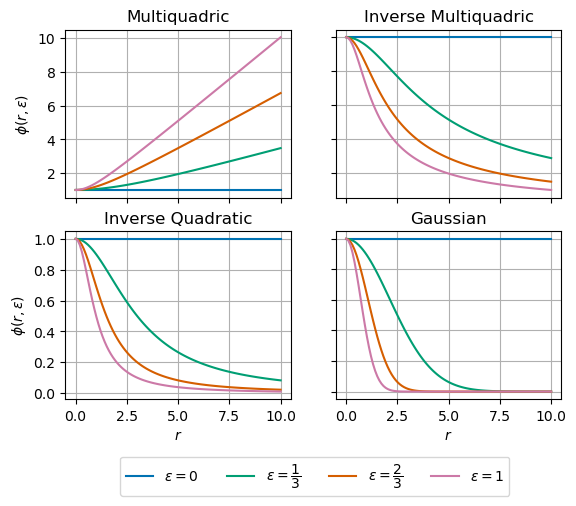

In [597]:
eps = np.linspace(0, 1, 4)
leg = [r'$\epsilon = 0$', r'$\epsilon = \dfrac{1}{3}$', r'$\epsilon = \dfrac{2}{3}$', r'$\epsilon = 1$']
rs = np.linspace(0, 10, 100)

fig, axs = plt.subplots(2, 2)

plt.style.use('seaborn-v0_8-colorblind')

for i, ep in enumerate(eps):
    axs[0, 0].plot(rs, phi('MQ', rs, ep), label = leg[i])
    axs[0, 1].plot(rs, phi('IMQ', rs, ep))
    axs[1, 0].plot(rs, phi('IQ', rs, ep))
    axs[1, 1].plot(rs, phi('GS', rs, ep))

axs[0, 0].set_title('Multiquadric')
axs[0, 1].set_title('Inverse Multiquadric')
axs[1, 0].set_title('Inverse Quadratic')
axs[1, 1].set_title('Gaussian')

for ax in axs.flat:
    ax.set(xlabel = r'$r$', ylabel = r'$\phi(r, \epsilon)$')
    ax.grid(True)

for ax in axs.flat:
    ax.label_outer()

axs[0, 0].legend(bbox_to_anchor=(2, -1.5), fancybox = True, frameon = True, ncol=len(leg));

But to better characterize the convergence behaviour we will also use finitely smooth RBFs, in particular quadratic 
$$
\phi(r)=(3+3r+r^2)e^{-r}
$$
and cubic Matérn kernels
$$
\phi(r)=(15+15r+6r^2+r^3)e^{-r}.
$$
This will be elaborated later on.

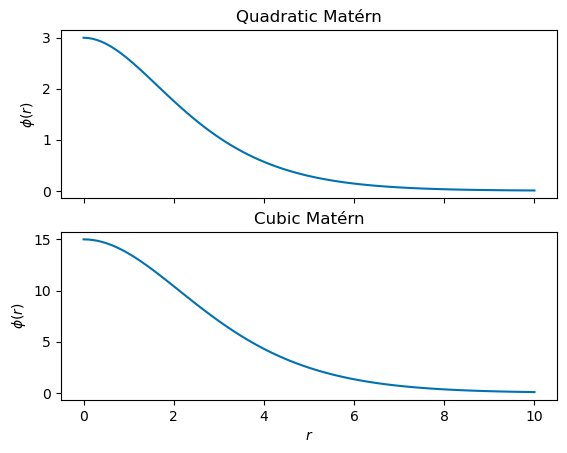

In [552]:
fig, axs = plt.subplots(2)

axs[0].plot(rs, phi('QM', rs))
axs[1].plot(rs, phi('CM', rs))

axs[0].set_title('Quadratic Matérn')
axs[1].set_title('Cubic Matérn')

for ax in axs.flat:
    ax.set(xlabel = r'$r$', ylabel = r'$\phi(r)$')

for ax in axs.flat:
    ax.label_outer()

### Why did we choose this RBF?
In the following we will be mostly using the MQ RBF. \
It can be shown, that all infinitely smooth RBFs behave similar (at least for Kansa's methods), but since MQ is the only RBF increasing around $\mathbf{x}_j$ we choose this RBF to rather overestimate than underestimate the solution.

# RBF Methods

## Introduction of the test problem
This test problem is introduced in [A numerical study of some radial basis function based solution methods for elliptic PDEs; Larsson & Fornberg](https://www.sciencedirect.com/science/article/pii/S0898122103901519).\
To test the solving methods introduced in the following, we will be using the test case of the Poisson equation with Dirichlet boundary conditions
$$
\begin{cases}
\Delta u = f\qquad & \text{in}\ \Omega ,\\
u = g & \text{in}\ \partial \Omega
\end{cases}
$$
where the Laplace operator $\Delta$ gives $\Delta u = \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}$ and $\Omega$ is the unit disk. \
We assume the solution to be
$$
u(x,y)=\frac{65}{65 + (x - 0.2)^2 + (y + 0.1)^2}
$$
and from there calculate backwards
$$
f=\Delta u
$$
and
$$
g=u(x,\pm\sqrt{1-x^2})\qquad\text{for}\ x \in [-1, 1].
$$
For any of the solving methods below we will be using the differential operator acting on the RBF, i.e. $\Delta \phi$.
Since $\phi$ is given in polar coordinates, we can use those and transform the Laplace operator to
$$
\Delta = \frac{\partial^2}{\partial r^2}+\frac{1}{r}\frac{\partial}{\partial r}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2}.
$$
And since $\phi(r,\epsilon)$ only depends on $r$ we can write
$$
\Delta \phi= \frac{\partial^2\phi}{\partial r^2}+\frac{1}{r}\frac{\partial\phi}{\partial r}.
$$
Using the MQ RBF yields
$$
\Delta \phi(r,\epsilon)=\frac{\epsilon^2(2+(\epsilon r)^2)}{(1+(\epsilon r)^2)^{\frac{3}{2}}}.
$$

In [201]:
def my_arctan(x1, x2):
    # Returns angle in the interval [0, 2pi]

    phi = np.arctan2(x2, x1)
    phi += (phi < 0) * 2 * math.pi

    return phi

def domain(str_type, N_I, N_B, cnt_dist, N_E, seed_ = None, alpha = None):
    assert str_type in ['ud', 'pacman'], 'Given domain not defined.'
    if str_type == 'ud':
        sc = True
        if seed_ is None:
            sc = False
        rng_cnt = qmc.Halton(d = 1, scramble = sc, seed = seed_) # Pseudo random number generator for one dimension (angel)
        theta_cnt = rng_cnt.random(n = N_B) * 2 * np.pi # Generate N_B numbers and scale from [0, 1] to [0, 2 * Pi]
        
        # With these values compute points on circle with radius 1 + cnt_dist
        cntd_x = (1 + cnt_dist) * np.sin(theta_cnt)
        cntd_y = (1 + cnt_dist) * np.cos(theta_cnt)
        
        cntd = np.array([cntd_x, cntd_y]).T.reshape(N_B,2)

        if seed_ is not None:
            seed_ += 1
        
        rng_bdy = qmc.Halton(d = 1, scramble = sc, seed = seed_) # Pseudo random number generator for one dimension (angel)
        theta_bdy = rng_bdy.random(n = N_B) * 2 * np.pi # Generate N_B numbers and scale from [0, 1] to [0, 2 * Pi]
        
        # With these values compute points on unit circle
        bdyd_x = np.sin(theta_bdy)
        bdyd_y = np.cos(theta_bdy)
        
        bdyd = np.array([bdyd_x, bdyd_y]).T.reshape(N_B,2)
        
        # Pseudo random number generator for two dimensions (x, y)
        rng_int = qmc.Halton(d = 2, scramble = sc, seed = seed_)
        
        # Generate "Monte-Carlo like" N_I points
        intd = 2 * rng_int.random(n = N_I) - 1
        intd = intd[np.linalg.norm(intd, axis = 1) < 1]
        while len(intd) < N_I:
            intd = np.append(intd, 2 * rng_int.random(n = N_I - len(intd)) - 1, axis = 0)
            intd = intd[np.linalg.norm(intd, axis = 1) < 1]
            
        N_E2 = np.sqrt(N_E).astype(int)
        errd0_, errd1_ = np.meshgrid(np.linspace(-1, 1, N_E2), np.linspace(-1, 1, N_E2))
        errd = np.concatenate((errd0_.reshape(-1, 1), errd1_.reshape(-1, 1)), axis = 1)
        errd = errd[np.linalg.norm(errd, axis = 1) < 1, :]                           # shrink to circle

        return intd, bdyd, cntd, errd

    elif str_type == 'pacman':
        assert 0 <= alpha <= 2, 'alpha must satisfy 0 <= alpha * pi <= 2pi'
    
        # Create interior
        sampler = qmc.Halton(d = 2, scramble=True, seed = seed_) # 982 guter Seed
        #X1 = 2*sampler.random(n = n1) - 1
        #np.random.seed(98191) # "guter" seed
        #np.random.seed(98)
        X1 = 2 * sampler.random(n = N_I) - 1
        X1 = X1[np.linalg.norm(X1, axis=1) < 1]
        X1 = X1[my_arctan(X1[:, 0], X1[:, 1]) < math.pi * alpha, :]
        #X1 = X1[my_arctan(X1[:, 0], X1[:, 1]) > 1/50 * math.pi, :] 
        while len(X1) < N_I:
            X1 = np.append(X1, 2*sampler.random(n = N_I - len(X1)) - 1, axis = 0)
            X1 = X1[np.linalg.norm(X1, axis=1) < 1]
            X1 = X1[my_arctan(X1[:, 0], X1[:, 1]) < math.pi * alpha, :]      # this is not 100% correct due to points with y=0
            #X1 = X1[my_arctan(X1[:, 0], X1[:, 1]) > 1/50 * math.pi, :] 

        if seed_ is not None:
            seed_ += 1
            
        # Create boundary
        sampler = qmc.Halton(d = 1, scramble=True, seed = seed_)
        cons = alpha * math.pi + 2
        n2_1 = int(np.round(alpha * math.pi * N_B / cons))
        n2_2 = int(np.round(N_B / cons))
        array_linspace_1 = (sampler.random(n = n2_1)).reshape(-1, 1)
        #array_linspace_2 = (sampler.random(n = n2_2)).reshape(-1, 1)
        #array_linspace_1 = np.linspace(0, 1, n2_1).reshape(-1, 1)
        array_linspace_2 = np.linspace(0.1, 1, n2_2).reshape(-1, 1)
        X2_Gamma1 = np.concatenate((array_linspace_2, np.zeros_like(array_linspace_2)), axis=1)
        X2_Gamma2 = np.concatenate((np.cos(array_linspace_1 * alpha * math.pi), np.sin(array_linspace_1  * alpha * math.pi)), axis=1)
        X2_Gamma3 = np.concatenate((np.cos(alpha * math.pi) * array_linspace_2,
                                    np.sin(alpha * math.pi) * array_linspace_2), axis=1)
    
        X2 = np.concatenate((X2_Gamma1, X2_Gamma2, X2_Gamma3), axis=0)
    
    
        # Create a meshgrid using numpy.meshgrid
        X1_grid0_, X1_grid1_ = np.meshgrid(np.linspace(-1, 1, int(np.sqrt(N_E))), np.linspace(-1, 1, int(np.sqrt(N_E))))
        X1_grid = np.concatenate((X1_grid0_.reshape(-1, 1), X1_grid1_.reshape(-1, 1)), axis=1)
        X1_grid = X1_grid[np.linalg.norm(X1_grid, axis=1) < 1, :]                           # shrink to circle
        X1_grid = X1_grid[my_arctan(X1_grid[:, 0], X1_grid[:, 1]) < alpha * math.pi, :]     # shrink to angle
    
        return X1, X2, X1_grid

In [103]:
def func(str_type, alpha = None):
    x, y, r, a = symbols('x y r a')
    assert str_type in ['u1', 'singular', 'smooth'], 'Given function not included.'
    if str_type == 'u1':
        u_ = 65 / (65 + (x - 0.2) ** 2 + (y + 0.1) ** 2)
        u = lambdify([x, y], u_)
        f = lambdify([x, y], simplify(diff(u_, x, x) + diff(u_, y, y)))
    elif str_type == 'singular':
        assert alpha is not None, 'Provide alpha value for str_function = singular!'

        u = lambda x, y: (np.linalg.norm([x, y], axis=0, keepdims=True) ** (1 / alpha) \
                      * np.sin(my_arctan(x, y) / alpha) + 1).T
        f = lambda x, y: np.zeros((x.shape[0], 1))
    elif str_type == 'smooth':
        u = lambda x, y: (np.linalg.norm([x, y], axis=0, keepdims=True) ** 2 + 1).T
        f = lambda x, y: 4 * np.ones((x.shape[0], 1))

    return u, f

r, e = symbols('r e')
Lphi_mq = lambdify([r, e], simplify(diff(phi_sp('MQ', r, e), r, r) + 1 / r * diff(phi_sp('MQ', r, e), r)))
Lphi_imq = lambdify([r, e], simplify(diff(phi_sp('IMQ', r, e), r, r) + 1 / r * diff(phi_sp('IMQ', r, e), r)))
Lphi_iq = lambdify([r, e], simplify(diff(phi_sp('IQ', r, e), r, r) + 1 / r * diff(phi_sp('IQ', r, e), r)))
Lphi_gs = lambdify([r, e], simplify(diff(phi_sp('GS', r, e), r, r) + 1 / r * diff(phi_sp('GS', r, e), r)))
Lphi_qm = lambdify(r, simplify(diff(phi_sp('QM', r), r, r) + 1 / r * diff(phi_sp('QM', r), r)))
Lphi_cm = lambdify(r, simplify(diff(phi_sp('CM', r), r, r) + 1 / r * diff(phi_sp('CM', r), r)))

def Lphi(str_type, r_, e_ = None):
    r, e = symbols('r e')
    assert str_type in ['MQ', 'IMQ', 'IQ', 'GS', 'QM', 'CM'], 'Given RBF type not included in function.'
    if str_type in ['MQ', 'IMQ', 'IQ', 'GS']:
        assert e is not None, 'Provide shape parameter e for this RBF type'
    if str_type == 'MQ': #Multiquadric
        out = Lphi_mq(r_, e_)
    elif str_type == 'IMQ': #Inverse Multiquadric
        out = Lphi_imq(r_, e_)
    elif str_type == 'IQ': #Inverse Quadratic
        out = Lphi_iq(r_, e_)
    elif str_type == 'GS': #Gaussian
        out = Lphi_gs(r_, e_) 
    #Finitely smooth RBFs (do not require shape parameter)
    elif str_type == 'QM': #Quadratic Matérn
        out = Lphi_qm(r_) 
    elif str_type == 'CM': #Cubic Matérn
        out = Lphi_cm(r_)
    return out

def L2phi_sp(str_type):
    r, e = symbols('r e')
    assert str_type in ['MQ', 'IMQ', 'IQ', 'GS', 'QM', 'CM'], 'Given RBF type not included in function.'
    Lphi_ = simplify(diff(phi_sp(str_type, r, e), r, r) + 1 / r * diff(phi_sp(str_type, r, e), r))
    L2phi_ = simplify(diff(Lphi_, r, r) + 1 / r * diff(Lphi_, r))
    if str_type in ['MQ', 'IMQ', 'IQ', 'GS']:
        out = lambdify([r, e], L2phi_)
    else:
        out = lambdify(r, L2phi_)

    return out

L2phi_mq = L2phi_sp('MQ')
L2phi_imq = L2phi_sp('IMQ')
L2phi_iq = L2phi_sp('IQ')
L2phi_gs = L2phi_sp('GS')
L2phi_qm = L2phi_sp('QM')
L2phi_cm = L2phi_sp('CM')

def L2phi(str_type, r_, e_ = None):
    assert str_type in ['MQ', 'IMQ', 'IQ', 'GS', 'QM', 'CM'], 'Given RBF type not included in function.'
    if str_type in ['MQ', 'IMQ', 'IQ', 'GS']:
        assert e is not None, 'Provide shape parameter e for this RBF type'
    if str_type == 'MQ': #Multiquadric
        out = L2phi_mq(r_, e_)
    elif str_type == 'IMQ': #Inverse Multiquadric
        out = L2phi_imq(r_, e_)
    elif str_type == 'IQ': #Inverse Quadratic
        out = L2phi_iq(r_, e_)
    elif str_type == 'GS': #Gaussian
        out = L2phi_gs(r_, e_) 
    #Finitely smooth RBFs (do not require shape parameter)
    elif str_type == 'QM': #Quadratic Matérn
        out = L2phi_qm(r_) 
    elif str_type == 'CM': #Cubic Matérn
        out = L2phi_cm(r_)
    return out

## Kansa's Methods
Source: [A numerical study of some radial basis function based solution methods for elliptic PDEs; Larsson & Fornberg](https://www.sciencedirect.com/science/article/pii/S0898122103901519) \
The basic idea of Kansa's methods is to use RBFs to interpolate the solution to a PDE, i.e.
$$
\hat{u}(\mathbf{x})=\sum^N_{j=1}\lambda_j\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon)
$$
where one tries to find $\lambda_j$ s.t. $\hat{u}\approx u$. \
By the nature of numerical methods this is done for finitely discretized points $\mathbf{x}_j$ in $\overline{\Omega}=\Omega \cup \partial \Omega$ of number $N$, which are also used to evaluate the solution, i.e. $\mathbf{x}=\mathbf{x}_i$ with $\mathbf{x}_i\in\{\mathbf{x}_j|\forall j\in\{1,...,N\}\}$. Where $X_{\Omega}:=\{\mathbf{x}_j|\forall j\in\{1,...,N_I\}\}$ is the set of all points in $\Omega$ and $X_{\partial\Omega}:=\{\mathbf{x}_j|\forall j\in\{N_I,...,N_I+N_B\}\}$ is the set of all points on $\partial \Omega$ with $N_I$ the number of points in $\Omega$ and $N_B$ the number of points on $\partial \Omega$ and $N=N_I+N_B$. One advantage of RBF methods is, that these points don't have to be on a grid, which is the case for most other solving methods. \
Plugging this into the test problem yields
$$
\begin{cases}
\sum^N_{j=1}\lambda_j\Delta \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon)  = \Delta u(\mathbf{x}_i) \qquad & i=1,...,N_I,\\
\sum^N_{j=1}\lambda_j \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon) = u(\mathbf{x}_i) & i=N_I+1,...,N
\end{cases}
$$

In [211]:
def kansa(str_type, str_type_phi, e, int, bdy, err, cnt = None):
    assert str_type in ['unsym','sym','unsym_cnt'], 'Given method not an implemented Kansa method!'
    if str_type == 'unsym':
        dm = distance_matrix(err, np.append(int, bdy, axis = 0))
        dm_int = distance_matrix(int, np.append(int, bdy, axis = 0))
        dm_bdy = distance_matrix(bdy, np.append(int, bdy, axis = 0))
    elif str_type == 'sym':
        dm_int = distance_matrix(err, int)
        dm_bdy = distance_matrix(err, bdy)
        dm_int_int = distance_matrix(int, int)
        dm_int_bdy = distance_matrix(int, bdy)
        dm_bdy_int = distance_matrix(bdy, int)
        dm_bdy_bdy = distance_matrix(bdy, bdy)
    elif str_type == 'unsym_cnt':
        assert cnt is not None, 'This method needs given center points!'
        int_bdy = np.append(int, bdy, axis = 0)
        dm = distance_matrix(err, np.append(int_bdy, cnt, axis = 0))
        dm_int = distance_matrix(int_bdy, np.append(int_bdy, cnt, axis = 0))
        dm_bdy = distance_matrix(bdy, np.append(int_bdy, cnt, axis = 0))
        
    if str_type == 'unsym':
        u_tilde = np.append(f(int.T[0], int.T[1]), u(bdy.T[0], bdy.T[1]), axis = 0)
        A = np.asarray(np.bmat([[Lphi(str_type_phi, dm_int, e)], [phi(str_type_phi, dm_bdy, e)]]))
        lam = linalg.solve(A, u_tilde)
        u_approx = np.dot(phi(str_type_phi, dm, e), lam)
    elif str_type == 'unsym_cnt':
        u_tilde = np.append(f(int_bdy.T[0], int_bdy.T[1]), u(bdy.T[0], bdy.T[1]), axis = 0)
        A = np.asarray(np.bmat([[Lphi(str_type_phi, dm_int, e)], [phi(str_type_phi, dm_bdy, e)]]))
        lam = linalg.solve(A, u_tilde)
        u_approx = np.dot(phi(str_type_phi, dm, e), lam)
    else:
        u_tilde = np.append(u(bdy.T[0], bdy.T[1]), f(int.T[0], int.T[1]), axis = 0)
        A = np.asarray(np.bmat([[phi(str_type_phi, dm_bdy_bdy, e), Lphi(str_type_phi, dm_bdy_int, e)], \
                                [Lphi(str_type_phi, dm_int_bdy, e), L2phi(str_type_phi, dm_int_int, e)]]))
        lam = linalg.solve(A, u_tilde)
        u_approx = np.dot(np.asarray(np.bmat([phi(str_type_phi, dm_bdy, e), Lphi(str_type_phi, dm_int, e)])), lam)

    return u_approx

### Unsymmetric Method
The straight forward way of solving this system of equations is to write it in matrix-vector form, i.e.
$$
\mathbf{A}\mathbf{\lambda}=\mathbf{f},
$$
where $\mathbf{f}=(\Delta u(x_1),...,\Delta u(x_{N_I}),u(x_{N_I+1}),...,u(x_N))^\top$, $\mathbf{\lambda}=(\lambda_1,...,\lambda_N)^\top$
and $\mathbf{A}$ is a $N\times N$ matrix of the form
$$
\begin{bmatrix}
\Delta \phi \\
\hline
\phi
\end{bmatrix},
$$
and solving this equation by finding the inverse $\mathbf{A}^{-1}$. \
Note, that $\mathbf{A}$ is unsymmetric, hence the method is called unsymmetric, which may lead to an ill-conditioned matrix and therefore error-prone solutions. \
$\mathbf{A}$ then looks like
$$
\begin{bmatrix}
\Delta \phi(||x_1-x_1||, \epsilon) & \Delta \phi(||x_1-x_2||, \epsilon) & \dots & \Delta \phi(||x_1-x_N||, \epsilon) \\
\Delta \phi(||x_2-x_1||, \epsilon) & \Delta \phi(||x_2-x_2||, \epsilon) & \dots & \Delta \phi(||x_2-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\Delta \phi(||x_{N_I}-x_1||, \epsilon) & \Delta \phi(||x_{N_I}-x_2||, \epsilon) & \dots & \Delta \phi(||x_{N_I}-x_N||, \epsilon) \\
\phi(||x_{N_I+1}-x_1||, \epsilon) & \phi(||x_{N_I+1}-x_2||, \epsilon) & \dots & \phi(||x_{N_I+1}-x_N||, \epsilon) \\
\phi(||x_{N_I+2}-x_1||, \epsilon) & \phi(||x_{N_I+2}-x_2||, \epsilon) & \dots & \phi(||x_{N_I+2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\phi(||x_N-x_1||, \epsilon) & \phi(||x_N-x_2||, \epsilon) & \dots & \phi(||x_N-x_N||, \epsilon)
\end{bmatrix}.
$$
Solving this for $\mathbf{\lambda}=\mathbf{A}^{-1}\mathbf{f}$ yields
$$
\hat{u}(\mathbf{\tilde{x}})=\mathbf{B}(\mathbf{\tilde{x}})\mathbf{\lambda}
$$
with
$$
\mathbf{B}(\mathbf{\tilde{x}})=
\begin{bmatrix}
\phi(||\tilde{x}_1-x_1||, \epsilon) & \phi(||\tilde{x}_1x_2||, \epsilon) & \dots & \phi(||\tilde{x}_1-x_N||, \epsilon) \\
\phi(||\tilde{x}_2-x_1||, \epsilon) & \phi(||\tilde{x}_2-x_2||, \epsilon) & \dots & \phi(||\tilde{x}_2-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\phi(||\tilde{x}_K-x_1||, \epsilon) & \phi(||\tilde{x}_K-x_2||, \epsilon) & \dots & \phi(||\tilde{x}_K-x_N||, \epsilon)
\end{bmatrix},
$$
where $\mathbf{\tilde{x}}=(\tilde{x}_1,...,\tilde{x}_K)^\top$ can contain arbitrary $x_i\in\Omega$ for $i=1,...,K$ and can be of arbitrary length $K$. \
In the following $\mathbf{\tilde{x}}$ will often be referred to as error points, since we will evaluate the error in these points. \
The pointwise error will just be displayed as $|\hat{u}(\tilde{x}_i)-u(\tilde{x}_i)|$ for $i=1,...,K$.

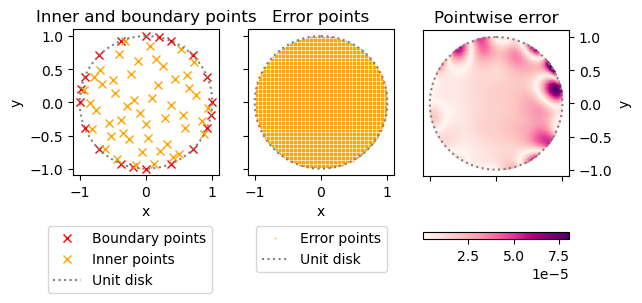

In [562]:
inte, bdy, trash, err = domain('ud', 50, 20, 0.5, 10000)
u, f = func('u1')
u_approx = kansa('unsym', 'MQ', 0.7, inte, bdy, err)

fig, axs = plt.subplots(1, 3)

th = np.linspace(0, 2 * np.pi, 100)

cmap = plt.get_cmap('RdPu')

axs[0].plot(bdy.T[0], bdy.T[1], color = 'red', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Boundary points')
axs[0].plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Inner points')

axs[1].plot(err.T[0], err.T[1], color = 'orange', linestyle = 'None', markersize = 0.5, marker = 'x', label = 'Error points')

p = axs[2].scatter(err.T[0], err.T[1], c = np.absolute(u_approx - u(err.T[0], err.T[1])) , cmap = cmap, s = 2, marker = 'p');
fig.colorbar(p, orientation = 'horizontal', pad = 0.15);

axs[0].set_title('Inner and boundary points')
axs[1].set_title('Error points')
axs[2].set_title('Pointwise error')

axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
    ax.set(xlabel = 'x', ylabel = 'y')

for ax in axs.flat:
    ax.label_outer()

axs[0].legend(bbox_to_anchor = (1, -0.3))
axs[1].legend(bbox_to_anchor = (1, -0.3));

### Symmetric Method
To make sure the matrix $\mathbf{A}$ is symmetric we define our interpolant with an extra term
$$
\hat{u}(\mathbf{x})=\sum^N_{j=N_I+1}\lambda_j\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon)+\sum^{N_I}_{j=1}\lambda_j\Delta\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon).
$$
Plugging this into the test problem yields
$$
\begin{cases}
\sum^N_{j=N_I+1}\lambda_j\Delta \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon) + \sum^{N_I}_{j=1}\lambda_j\Delta^2 \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon)  & = \Delta u(\mathbf{x}_i) \qquad & i=1,...,N_I,\\
\sum^N_{j=N_I+1}\lambda_j \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon) + \sum^{N_I}_{j=1}\lambda_j\Delta \phi(||\mathbf{x}_i-\mathbf{x}_j||,\epsilon) & = u(\mathbf{x}_i) & i=N_I+1,...,N
\end{cases}
$$
Now, this problem can be solved similarly by first writing it in matrix vector form, where $\mathbf{f}=(u(x_{N_I+1}),...,u(x_N),\Delta u(x_1),...,\Delta u(x_{N_I}))^\top$, $\mathbf{\lambda}=(\lambda_{N_I+1},...,\lambda_N,\lambda_1,...,\lambda_{N_I})^\top$ and $\mathbf{A}$ now is of form
$$
\left[
\begin{array}{c|c}
\phi & \Delta \phi \\
\hline
\Delta \phi & \Delta^2 \phi
\end{array}
\right],
$$
i.e. symmetric, since each submatrix is symmetric due to the symmetry of the RBFs. \
Note, $\mathbf{A}$ is still a $N\times N$ matrix.

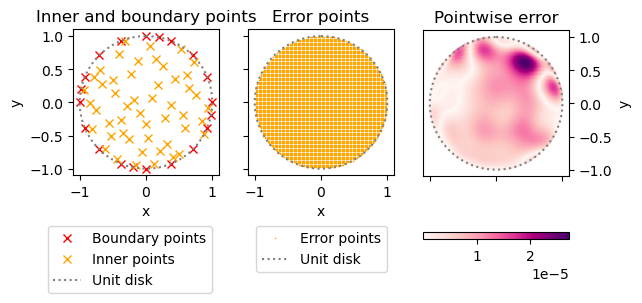

In [565]:
inte, bdy, trash, err = domain('ud', 50, 20, 0.5, 10000)
u, f = func('u1')
u_approx = kansa('sym', 'MQ', 0.7, inte, bdy, err)

fig, axs = plt.subplots(1, 3)

th = np.linspace(0, 2 * np.pi, 100)

cmap = plt.get_cmap('RdPu')

axs[0].plot(bdy.T[0], bdy.T[1], color = 'red', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Boundary points')
axs[0].plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Inner points')

axs[1].plot(err.T[0], err.T[1], color = 'orange', linestyle = 'None', markersize = 0.5, marker = 'x', label = 'Error points')

p = axs[2].scatter(err.T[0], err.T[1], c = np.absolute(u_approx - u(err.T[0], err.T[1])) , cmap = cmap, s = 2, marker = 'p');
fig.colorbar(p, orientation = 'horizontal', pad = 0.15);

axs[0].set_title('Inner and boundary points')
axs[1].set_title('Error points')
axs[2].set_title('Pointwise error')

axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
    ax.set(xlabel = 'x', ylabel = 'y')

for ax in axs.flat:
    ax.label_outer()

axs[0].legend(bbox_to_anchor = (1, -0.3))
axs[1].legend(bbox_to_anchor = (1, -0.3));

### Unsymmetric Method with additional center points
As can be seen in the results for the previously introduced methods, the error is greatest at or close to the boundary. \
So the idea to reduce the impact of the boundary is to interpolate the solution beyond the boundary and then restricting the found solution back to the domain $\Omega$. For this we need additionally to our boundary and inner points so called center points that lay beyond our domain $\Omega$. \
Here we choose to place those center points equidistant to our boundary $\partial \Omega$, i.e. on a circle with radius $>1$, where we choose $N_B$ center points s.t. the resulting matrix is still square. \
This way we define a new set of points
$$
z_j
\begin{cases}
x_j, \qquad & j=1,...,N \\
\text{a point outside } \Omega, \qquad & j=N+1,...,N+N_B
\end{cases}
$$
To solve the problem we again choose the unsymmetric method, which, with the new points, becomes
$$
\begin{cases}
\sum^{N+N_B}_{j=1}\lambda_j\Delta \phi(||\mathbf{x}_i-\mathbf{z}_j||,\epsilon)  = \Delta u(\mathbf{x}_i) \qquad & i=1,...,N,\\
\sum^{N+N_B}_{j=1}\lambda_j \phi(||\mathbf{x}_i-\mathbf{z}_j||,\epsilon) = u(\mathbf{x}_i) & i=N_I+1,...,N
\end{cases}
$$
Note, $\mathbf{A}$ is now a larger $(N+N_B)\times (N+N_B)$ matrix.

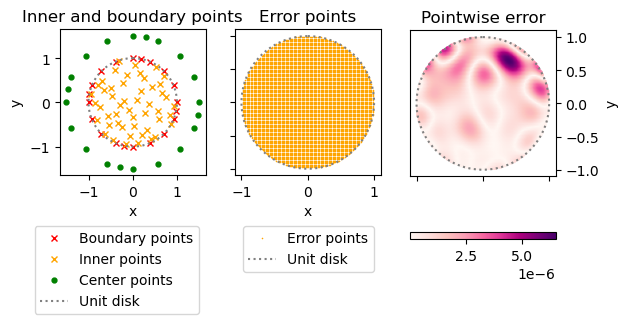

In [568]:
inte, bdy, cnt, err = domain('ud', 50, 20, 0.5, 10000)
u, f = func('u1')
u_approx = kansa('unsym_cnt', 'MQ', 0.7, inte, bdy, err, cnt)

fig, axs = plt.subplots(1, 3)

th = np.linspace(0, 2 * np.pi, 100)

cmap = plt.get_cmap('RdPu')

axs[0].plot(bdy.T[0], bdy.T[1], color = 'red', linestyle = 'None', markersize = 4.5, marker = 'x', label = 'Boundary points')
axs[0].plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 4.5, marker = 'x', label = 'Inner points')
axs[0].plot(cnt.T[0], cnt.T[1], color = 'green', linestyle = 'None', markersize = 3.5, marker = 'o', label = 'Center points')

axs[1].plot(err.T[0], err.T[1], color = 'orange', linestyle = 'None', markersize = 0.5, marker = 'x', label = 'Error points')

p = axs[2].scatter(err.T[0], err.T[1], c = np.absolute(u_approx - u(err.T[0], err.T[1])) , cmap = cmap, s = 2, marker = 'p');
fig.colorbar(p, orientation = 'horizontal', pad = 0.15);

axs[0].set_title('Inner and boundary points')
axs[1].set_title('Error points')
axs[2].set_title('Pointwise error')

axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
    ax.set(xlabel = 'x', ylabel = 'y')

for ax in axs.flat:
    ax.label_outer()

axs[0].legend(bbox_to_anchor = (1, -0.3))
axs[1].legend(bbox_to_anchor = (1, -0.3));

## RBF-Galerkin
Note: All of this is completely wrong... \
Source:
[Meshfree approximation methods with MATLAB; Fasshauer](https://katalogplus.sub.uni-hamburg.de/vufind/Record/53849686X?rank=1) \
All the methods presented so far are ment to solve problems with smooth initial data, i.e. the functions $f$ and $g$ are smooth, which might not be the case for any reallife application, where data is probably perturbed. \
Which in general is not a problem for the solvability, since any numerical approach takes a discretization s.t. we can't differentiate between smooth and non-smooth functions. \
But to counter overfitting to these perturbations it might be benefical to look at the weak solution, i.e. the weak formulation of a problem, rather than the classical solution, since any weak solution allows for discontinuities both in initial data as well as in the solution and in that smoothes out any perturbations. \
In weak formulation our test problem becomes
$$
\begin{cases}
\int_\Omega \Delta u \phi \text{d}x = \int_\Omega f\phi \text{d}x\qquad & \text{in}\ \Omega ,\\
u = g & \text{in}\ \partial \Omega
\end{cases}
$$
where $\phi$ is a test function, but since our RBFs are sufficiently smooth, we can use those as test functions. \
To incoporate the boundary condition in the integral formulation, we use integration by parts, which yields
$$
\int_{\partial \Omega} \nabla u \phi\cdot \text{d}\mathbf{S} - \int_\Omega \nabla u\cdot\nabla \phi \text{d}x = \int_\Omega f\phi \text{d}x.
$$
Using the boundary condition this becomes
$$
\int_\Omega \nabla u\cdot\nabla \phi \text{d}x = \int_{\partial \Omega} \nabla g \phi\cdot \text{d}\mathbf{S} - \int_\Omega f\phi \text{d}x.
$$
$\partial \Omega$ can be parametrized by
$$
\begin{bmatrix}
\sin{t} \\
\cos{t}
\end{bmatrix}
$$
for $t\in [0,2\pi)$. With this we can write
$$
\int_\Omega \nabla u\cdot\nabla \phi \text{d}x = \int_0^{2\pi} \nabla g(\mathbf{\tilde{x}}) \phi(\mathbf{\tilde{x}})\cdot
\begin{bmatrix}
\cos{t} \\
-\sin{t}
\end{bmatrix} 
\text{d}t - \int_\Omega f\phi \text{d}x,
$$
with $\mathbf{\tilde{x}}(t)=
\begin{bmatrix}
\sin{t} \\
\cos{t}
\end{bmatrix}$. \
Using the same interpolant as before, i.e.
$$
\hat{u}(\mathbf{x})=\sum^N_{j=1}\lambda_j\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon),
$$
this becomes
$$
\int_\Omega \sum^N_{j=1}\lambda_j\nabla\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon)\cdot \nabla \phi(||\mathbf{x}-\mathbf{x}_k||,\epsilon) \text{d}x = \int_0^{2\pi} \nabla g(\mathbf{\tilde{x}}) \phi(||\mathbf{\tilde{x}}-\mathbf{x}_k||,\epsilon)\cdot
\begin{bmatrix}
\cos{t} \\
-\sin{t}
\end{bmatrix} 
\text{d}t - \int_\Omega f\phi(||\mathbf{x}-\mathbf{x}_k||,\epsilon) \text{d}x
$$
for an arbitrary $\mathbf{x}_k\in\overline{\Omega}$. \
And since we impose for $u$, and therefore for $\hat{u}$, to be a weak solution, we can exchange integral and sum and write this problem in matrix vector form with
$$
\mathbf{A}_{jk}=\int_\Omega \nabla\phi(||\mathbf{x}-\mathbf{x}_j||,\epsilon)\cdot \nabla \phi(||\mathbf{x}-\mathbf{x}_k||,\epsilon) \text{d}x,
$$
$\mathbf{\lambda}=(\lambda_1,....,\lambda_N)^\top$ and RHS $\mathbf{b}=(\int_0^{2\pi} \nabla g(\mathbf{\tilde{x}}) \phi(||\mathbf{\tilde{x}}-\mathbf{x}_1||,\epsilon)\cdot
\begin{bmatrix}
\cos{t} \\
-\sin{t}
\end{bmatrix} 
\text{d}t - \int_\Omega f\phi(||\mathbf{x}-\mathbf{x}_1||,\epsilon) \text{d}x, ..., \int_0^{2\pi} \nabla g(\mathbf{\tilde{x}}) \phi(||\mathbf{\tilde{x}}-\mathbf{x}_N||,\epsilon)\cdot
\begin{bmatrix}
\cos{t} \\
-\sin{t}
\end{bmatrix} 
\text{d}t - \int_\Omega f\phi(||\mathbf{x}-\mathbf{x}_N||,\epsilon) \text{d}x)^\top$. \
Thus we can write the problem as
$$
\mathbf{A}\mathbf{\lambda}=\mathbf{b}
$$

In [203]:
def func_galerkin(str_type):
    x, y, p = symbols('x y p')
    assert str_type in ['u1'], 'Given function not included.'
    if str_type == 'u1':
        u_ = 65 / (65 + (x - 0.2) ** 2 + (y + 0.1) ** 2)
        u = lambdify([x, y], u_)
        g = lambdify(p, u_.subs(x, cos(p)).subs(y, sin(p)))
        f = lambdify([x, y], simplify(diff(u_, x, x) + diff(u_, y, y)))
    return u, g, f

def Nphi_sp(str_type):
    x, y, r, e = symbols('x y r e')
    return [simplify(diff((phi_sp(str_type, r, e) * (1 - r)).subs(r, sqrt(x ** 2 + y ** 2)), x)), \
            simplify(diff((phi_sp(str_type, r, e) * (1 - r)).subs(r, sqrt(x ** 2 + y ** 2)), y))]

x, y, e = symbols('x y e')
Nphi_mq = lambdify([x, y, e], Nphi_sp('MQ'))
Nphi_imq = lambdify([x, y, e], Nphi_sp('IMQ'))
Nphi_iq = lambdify([x, y, e], Nphi_sp('IQ'))
Nphi_gs = lambdify([x, y, e], Nphi_sp('GS'))
Nphi_qm = lambdify([x, y], Nphi_sp('QM'))
Nphi_cm = lambdify([x, y], Nphi_sp('CM'))
    

def Nphi(str_type, x_, y_, e_ = None): 
    assert str_type in ['MQ', 'IMQ', 'IQ', 'GS', 'QM', 'CM'], 'Given RBF type not included in function.'
    if str_type in ['MQ', 'IMQ', 'IQ', 'GS']:
        assert e is not None, 'Provide shape parameter e for this RBF type'
    if str_type == 'MQ': #Multiquadric
        out = Nphi_mq(x_, y_, e_)
    elif str_type == 'IMQ': #Inverse Multiquadric
        out = Nphi_imq(x_, y_, e_)
    elif str_type == 'IQ': #Inverse Quadratic
        out = Nphi_iq(x_, y_, e_)
    elif str_type == 'GS': #Gaussian
        out = Nphi_gs(x_, y_, e_) 
    #Finitely smooth RBFs (do not require shape parameter)
    elif str_type == 'QM': #Quadratic Matérn
        out = Nphi_qm(x_, y_) 
    elif str_type == 'CM': #Cubic Matérn
        out = Nphi_cm(x_, y_)
    return out

def u_0(x_, y_): # Poisson integral formula
    out = []
    for i in range(len(x_)):
        r_ = np.sqrt(x_[i] ** 2 + y_[i] ** 2)
        theta_ = (2 * np.heaviside(y_[i], 1) - 1) * np.arccos(x_[i] / r_)
        poisson = lambda phi_: (1 - r_ ** 2) / (1 - 2 * r_ * np.cos(theta_ - phi_) + r_ ** 2) * g(phi_)
        out.append(1 / (2 * np.pi) * integrate.quad(poisson, 0, 2 * np.pi)[0])
    return out

def phi_g(str_type, r_, e_):
    return phi(str_type, r_, e_) * (1 - r_)

In [231]:
def galerkin(str_type_phi, e, int, err):
    N_points = int.shape[1]
    A = np.zeros((N_points, N_points))
    b = np.zeros((N_points, 1))
    for i in range(N_points):
        for j in range(i):
            Nphi2 = lambda r, t: r * np.dot(Nphi(str_type_phi, r * np.cos(t) - int[0][i], r * np.sin(t) - int[1][i], e), \
                                        Nphi(str_type_phi, r * np.cos(t) - int[0][j], r * np.sin(t) - int[1][j], e))
            A[i][j] = integrate.dblquad(Nphi2, 0, 1, 0, 2 * np.pi)[0]
        b1 = lambda r, t: r * f(r * np.cos(t), r * np.sin(t)) * \
                            phi_g(str_type_phi, np.sqrt((int[0][i] - r * np.cos(t)) ** 2 + (int[1][i] - r * np.sin(t)) ** 2), e)
        b[i] = integrate.dblquad(b1, 0, 1, 0, 2 * np.pi)[0]
    A += A.T - np.diag(np.diag(A))
    lam_gal = linalg.solve(A, b)
    
    dm = distance_matrix(err, int.T)
    
    return np.dot(phi_g(str_type_phi, dm, e), lam_gal)

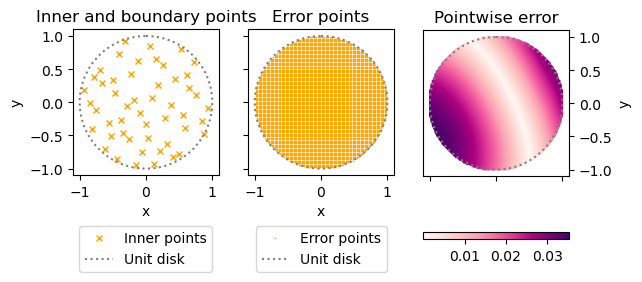

In [233]:
inte, trash1, trash2, err = domain('ud', 50, 20, 0.5, 10000)
u, g, f = func_galerkin('u1')
u_approx = galerkin('MQ', 0.7, inte.T, err)

fig, axs = plt.subplots(1, 3)

th = np.linspace(0, 2 * np.pi, 100)

cmap = plt.get_cmap('RdPu')

axs[0].plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 4.5, marker = 'x', label = 'Inner points')

axs[1].plot(err.T[0], err.T[1], color = 'orange', linestyle = 'None', markersize = 0.5, marker = 'x', label = 'Error points')

p = axs[2].scatter(err.T[0], err.T[1], c = np.absolute(u_approx + np.array(u_0(err.T[0], err.T[1])).reshape((err.shape[0], 1)) \
                                                           - u(err.T[0], err.T[1]).reshape((err.shape[0], 1))) , cmap = cmap, s = 5, marker = 'p');
fig.colorbar(p, orientation = 'horizontal', pad = 0.15);

axs[0].set_title('Inner and boundary points')
axs[1].set_title('Error points')
axs[2].set_title('Pointwise error')

axs[2].yaxis.set_label_position("right")
axs[2].yaxis.tick_right()

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
    ax.set(xlabel = 'x', ylabel = 'y')

for ax in axs.flat:
    ax.label_outer()

axs[0].legend(bbox_to_anchor = (1, -0.3))
axs[1].legend(bbox_to_anchor = (1, -0.3));

## RBF-Finite Differences

Source:
[Guidelines for RBF-FD Discretization: Numerical Experiments on the Interplay of a Multitude of Parameter Choices; Le Borne & Leinen](https://link.springer.com/article/10.1007/s10915-023-02123-7) \
In any of the previously shown methods we compute $\lambda_j$ for every $j=1,...,N$, i.e. for every point in our set $X_{\Omega}$ and $X_{\partial\Omega}$, even though we can assume, that a point $\mathbf{x}_j\in X:=X_{\Omega}\cup X_{\partial\Omega}$ that is sufficiently far away from the point $\mathbf{x}$, where we want to evaluate our approximation $\hat{u}(\mathbf{x})$, has very little influence on our approximation. Therefore we want to introduce a new method, RBF-Finite Differences (RBF-FD), that initially computes the weights $\lambda_j$, which in the following are replaced by $w_i^j$, only for a stencil around $\mathbf{x}$.\
As before we consider $N_I$ inner points and $N_B$ boundary points, where $N:=N_I+N_B$ and
$$
X_{\Omega}:=\{\mathbf{x}_1,..,\mathbf{x}_{N_I}\}\subset\Omega
$$
and
$$
X_{\partial \Omega}:=\{\mathbf{x}_{N_I + 1},..,\mathbf{x}_{N}\}\subset\partial\Omega
$$
are the corresponding sets of inner and boundary points.
We introduce a stencil size $n\leq N$ to define the stencil set $X_j$ relative to the stencil center point $\mathbf{x}_j$
$$
X_j=\{\mathbf{x}_{s_1^j}, ..., \mathbf{x}_{s_n^j}\}=\{\mathbf{x}_i\in X:i\in I_j\}\quad\text{for}\,I_j:=\{s_1^j,...,s_n^j\}
$$
The indices in $I_j\subseteq \{1,...,N\}$, $s_i^j$ are describing indices in $X$ for the $j$-th stencil. \
With this we want to compute weights ${w_1^j,...,w_n^j}\subset \mathbb{R}$, s.t. for a function $u$ and a differential operator $\mathcal{L}$ we can approximate
$$
\mathcal{L}u(\mathbf{x}_j)\approx\sum^n_{i=1}w_i^ju(\mathbf{x}_{s^j_i}).
$$
As before we consider basis function, such as RBFs, $k_1,...,k_n:\Omega\to \mathbb{R}$ with which we interpolate $u$
$$
p_u(\mathbf{x})=\sum_{i=1}^nu(\mathbf{x}_{s^j_i})k_i(\mathbf{x})
$$
This yields
$$
\mathcal{L}p_u(\mathbf{x})=\sum_{i=1}^nu(\mathbf{x}_{s^j_i})\mathcal{L}k_i(\mathbf{x})=\sum^n_{i=1}u(\mathbf{x}_{s^j_i})w_i
$$
The weights are defined by $w_i:=\mathcal{L}k_i(x)$. \
Consider $\{\phi_{\epsilon, \mathbf{x}_i}|i\in I_j\}$, the set of $n$ RBFs corresponding to the stencil points in $X_j$. \
Further we introduce the space of polynomials of $d$ variables of maximal order $l$,
$$
\Pi_l:=\text{span}\{p:\Omega\to\mathbb{R}, p(\mathbf{x})=\prod^d_{j=1}\mathbf{x}_j^{k_j}|k_j\in \mathbb{N}_0,\sum^d_{j=1}k_j\leq l\}
$$
$$
M:=\text{dim}\,\Pi_l=\binom{l+d}{d}.
$$
We define the basis of $\Pi_l$ as $\{p_1,...,p_{M}\}$ \
With this we define the function space corresponding to the stencil $X_j$ andjusted by this polynomial basis. \
This adjustment is needed to make sure the matrix we will define later won't be singular.
$$
\mathcal{R}_j:=\{s.\Omega\to \mathbb{R}, s(\mathbf{x})=\sum^n_{j=1}\lambda_i^j\{\phi_{\epsilon, \mathbf{x}_{s_i^j}}(\mathbf{x})+\sum^M_{k=1}\tilde{\lambda}_k^jp_k(\mathbf{x})|\lambda_i^j, \tilde{\lambda}_k^j\in\mathbb{R} \quad \text{s.t.}\,\sum^n_{j=1}\lambda_i^jp_k(\mathbf{x}_{s_i^j})=0\quad \text{for all}\,k\in\{1,...,M\}\}
$$
This interpolation $s\in\mathcal{R}_j$ of a function $f$ written in matrix form yields
$$
\begin{bmatrix}
A_j & P_j \\
P_j^T & 0
\end{bmatrix}\begin{bmatrix} \lambda^j \\ \tilde{\lambda}^j\end{bmatrix} = \begin{bmatrix} f^j \\ 0_M\end{bmatrix}
$$
And correspondingly for $f$ defined by a differential operator
$$
\begin{bmatrix}
A_j & P_j \\
P_j^T & 0
\end{bmatrix}\begin{bmatrix} w^j \\ \tilde{w}^j\end{bmatrix} = \begin{bmatrix} \mathcal{L}\phi_j \\ \mathcal{L}p_j\end{bmatrix}
$$
By inverting the matrix we can easily compute the weights $\begin{bmatrix} w^j \\ \tilde{w}^j\end{bmatrix}$, where $\tilde{w}^j$ are not used for any further computation s.t. they can be discarded. \
To use this to solve a PDE with Dirichlet boundary conditions
$$
\begin{cases}
  \mathcal{L}\mathbf{u}=\mathbf{f}\qquad & \text{in}\ \mathbb{R}^{n-1}\times(0,\infty), \\
  \mathbf{u}=\mathbf{g} & \text{on}\ \mathbb{R}^{n-1}\times\{t=0\},
\end{cases}
$$
we write
$$
\sum_{i=1}^nw_i^ju_{s_i^j}=f(\mathbf{x}_j), \qquad j\in\{1,...,N_I\}
$$
and set $u_{s_i^j}=g(\mathbf{x}_{s_i^j})$ for all $\mathbf{x}_{s_i^j}\in\partial\Omega$. \
This yields
$$
\sum_{\substack{i\in{1,...,n} \\ \text{s.t.}\, \mathbf{x}_{s_i^j}\in\Omega}}^nw_i^ju_{s_i^j}=f(\mathbf{x}_j)-\sum_{\substack{i\in{1,...,n} \\ \text{s.t.}\, \mathbf{x}_{s_i^j}\in\partial\Omega}}^nw_i^jg(\mathbf{x}_{s_i^j}), \qquad j\in\{1,...,N_I\}.
$$
We define $\tilde{f}_j:=f(\mathbf{x}_j)-\sum_{\substack{i\in{1,...,n} \\ \text{s.t.}\, \mathbf{x}_{s_i^j}\in\partial\Omega}}^nw_i^jg(\mathbf{x}_{s_i^j})$ and with this $\tilde{f}:=(\tilde{f}_1,...,\tilde{f}_{N_I})^\top\in\mathbb{R}^{N_I}$ as well as the matrix $B\in\mathbb{R}^{N_I\times N_I}$
$$
B_{j,l} = 
\begin{cases}
w_i^j & :\text{there exists}\, i\in\{1,...,n\}\,\text{s.t.}l=s_i^j\in I_j \\
0 & : else
\end{cases}
$$
for all $j, l \in \{1,...,N_I\}$. The first case means that, the interior point $\mathbf{x}_l=\mathbf{x}_{s^j_i}$ is in the stencil $X_j$. \
This way we can write 
$$
Bu=\tilde{f},
$$
which by inverting $B$ can be solved to retrieve $u$ the approximation of the solution. \
As one can see this yields, that the error points in the following are equal to the interior points. \
To implement this method we will again consider our test problem as introduced before.
### Stencil generation
The stencil corresponding to a point $\mathbf{x}_j$ can for example be the $n$ closest neighboring points (which will be used in the following), but using varying $n_j$ the stencil could also be introduced as all points inside a fixed radius around $\mathbf{x}_j$.

In [219]:
def stencil(xj ,yj, X_int, X_bdy, n):
    X = np.append(X_int, X_bdy, axis = 0)
    dm = distance_matrix(np.array([xj, yj]).reshape((2,1)).T, X).flatten()
    inds = np.argsort(dm).T
    out_int = []
    out_bdy = []
        
    for i in range(0, n):
        ind_c = inds[i]
        l = len(X_int)
        if ind_c < l:
            if len(out_int) == 0:
                out_int = np.array([X_int.T[0][ind_c], X_int.T[1][ind_c]]).reshape((2,1))
            else:
                out_int = np.append(out_int, np.array([X_int.T[0][ind_c], X_int.T[1][ind_c]]).reshape((2,1)), axis = 1)
        else:
            if len(out_bdy) == 0:
                out_bdy = np.array([X_bdy.T[0][ind_c - l], X_bdy.T[1][ind_c - l]]).reshape((2,1))
            else:
                out_bdy = np.append(out_bdy, np.array([X_bdy.T[0][ind_c - l], X_bdy.T[1][ind_c - l]]).reshape((2,1)), axis = 1)
    return out_int, out_bdy

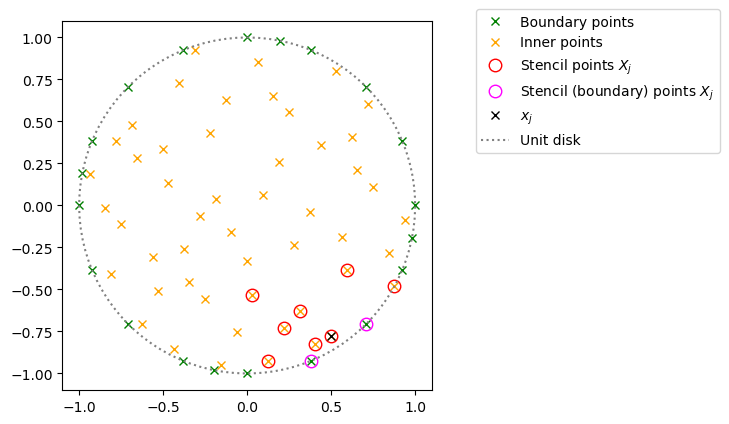

In [572]:
inte, bdy, cnt, err = domain('ud', 50, 20, 0.5, 10000)

th = np.linspace(0, 2*np.pi, 100) # Äquidistante Winkeldistribution für das Ploten der Einheitsscheibe

st_int, st_bdy = stencil(inte.T[0][2], inte.T[1][2], inte, bdy, 10)

#Plotten :)
plt.plot(bdy.T[0], bdy.T[1], color = 'green', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Boundary points');
plt.plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Inner points')
if len(st_int) > 0:
    plt.plot(st_int[0], st_int[1], color = 'red', linestyle = 'None', markersize = 9, marker = 'o', fillstyle = 'none', label = 'Stencil points $X_j$')
if len(st_bdy) > 0:
    plt.plot(st_bdy[0], st_bdy[1], color = 'magenta', linestyle = 'None', markersize = 9, marker = 'o', fillstyle = 'none', label = 'Stencil (boundary) points $X_j$')
plt.plot(inte.T[0][2], inte.T[1][2], color = 'black', linestyle = 'None', markersize = 5.5, marker = 'x', label = '$x_j$')
plt.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
plt.gca().set_aspect('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.show();

In [225]:
def polyn(l):
    x, y = symbols('x y')
    
    p_j = []
    for i in range(l + 1):
        for j in range(i + 1):
            p_j.append(x ** (i - j) * y ** j)
    
    return p_j

def P(st_x, l):
    M = int(binom(l + 2, l))
    out = np.ones((st_x.shape[0], M))
    x, y = symbols('x y')
    p_ = lambdify([x, y], polyn(l))
    
    for k, x in enumerate(st_x):
        out[k] = p_(x[0], x[1])
    
    return out
        

def A(str_type_phi, st_x, e):
    dm = distance_matrix(st_x, st_x)
    
    return phi(str_type_phi, dm, e)

def A_tilde(str_type_phi, st_x, e, l):
    A_ = A(str_type_phi, st_x, e)
    P_ = P(st_x, l)
    M = P_.shape[1]
    
    return np.bmat([[A_, P_], [P_.T, np.zeros((M, M))]])

def Lp(xj, l): 
    x, y = symbols('x y')
    p_ = polyn(l)
    lp = []
    
    for j in range(len(p_)):
        lp.append(diff(p_[j], x, x) + diff(p_[j], y, y))
    
    out = lambdify([x, y], lp)
        
    return out(xj[0], xj[1])

def RHS(str_type_phi, x, xj, l, n, e):
    lp_ = Lp(xj, l)
    out = np.ones((n + len(lp_),))
    for i in range(n):
        out[i] = Lphi(str_type_phi, np.sqrt((xj[0] - x[i][0]) ** 2 + (xj[1] - x[i][1]) ** 2), e)
    out[n:] = lp_
    
    return out
    

def rbf_fd(str_type_phi, X_int, X_bdy, l, n, e):
    X = np.append(X_int, X_bdy, axis = 0)
    N_I = X_int.shape[0]
    B = np.zeros((N_I, N_I))
    f_tilde = np.zeros((N_I,))
    
    for j in range(N_I):
        xj = X_int[j]
        st_int, st_bdy = stencil(xj[0], xj[1], X_int, X_bdy, n)
        if len(st_int) > 0 and len(st_bdy) > 0:
            st_x = np.append(st_int, st_bdy, axis = 1).T
        elif len(st_int) > 0:
            st_x = st_int.T
        else:
            st_x = st_bdy.T
        
        wj = linalg.solve(A_tilde(str_type_phi, st_x, e, l), RHS(str_type_phi, st_x, xj, l, n, e))[:n]
        
        #f_tilde[j] = f(xj[0], xj[1]) # For f tilde
        if len(st_bdy) > 0:
            sum_g = 0
            for i, x in enumerate(st_x):
                if x in st_bdy.T:
                    sum_g += wj[i] * u(x[0], x[1])
            f_tilde[j] -= sum_g
                    
        
        for l_i in range(N_I): # For B
            xl = X[l_i]
            i = -1
            for k, x in enumerate(st_int.T):
                if x[0] == xl[0] and x[1] == xl[1]:
                    i = k
                    break
            if i > -1:
                B[j][l_i] = wj[k]

    return linalg.solve(B, f_tilde)

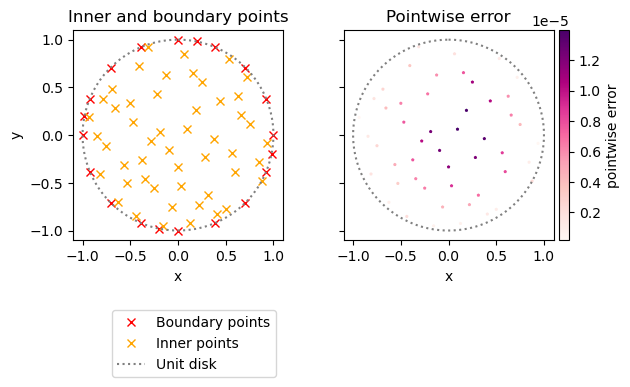

In [576]:
l = 2 # Maximale Ordnung für Monomials
e = .7 # Epsilon für RBF
n = 10 # Stencilgröße

inte, bdy, trash, trash = domain('ud', 50, 20, 0.5, 10000)
u, f = func('u1')
u_approx = rbf_fd('MQ', inte, bdy, l, n, e)

fig, axs = plt.subplots(1, 2)

th = np.linspace(0, 2 * np.pi, 100)

cmap = plt.get_cmap('RdPu')

axs[0].plot(bdy.T[0], bdy.T[1], color = 'red', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Boundary points')
axs[0].plot(inte.T[0], inte.T[1], color = 'orange', linestyle = 'None', markersize = 5.5, marker = 'x', label = 'Inner points')

divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
p = axs[1].scatter(inte.T[0], inte.T[1], c = np.absolute(u_approx - u(inte.T[0], inte.T[1])) , cmap = cmap, s = 2, marker = 'p');
fig.colorbar(p, cax = cax, label = 'pointwise error');

divider2 = make_axes_locatable(axs[0])
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
cax2.axis('off')

axs[0].set_title('Inner and boundary points')
axs[1].set_title('Pointwise error')

for ax in axs.flat:
    ax.set_aspect('equal')
    ax.plot(np.sin(th), np.cos(th), color = 'gray', linestyle = 'dotted', label = 'Unit disk');
    ax.set(xlabel = 'x', ylabel = 'y')

for ax in axs.flat:
    ax.label_outer()

axs[0].legend(bbox_to_anchor = (1, -0.3));

# Comparison of Methods
In the following we will compare the Kansa's methods and RBF-FD for different metric, which will be their convergence behaviour, their behaviour relative to the shape parameter $\epsilon$ and their behaviour around singularities. \
For this we introduce two different metrics to compute the error
$$
E_{\text{max}}:=\text{max}_i|\hat{u}(\mathbf{x}_i)-u(\mathbf{x}_i)|
$$
and
$$
E:=\frac{\sqrt{\sum_i(\hat{u}(\mathbf{x}_i)-u(\mathbf{x}_i))^2}}{N_E}
$$
where $N_E$ is the number of error points.

In [295]:
def E_max(u_app):
    return np.max(np.absolute(u_app - u(err.T[0], err.T[1])))

def Error(u_app):
    return np.sqrt(np.sum((u_app - u(err.T[0], err.T[1])) ** 2)) / u_approx.shape[0]

## Convergence
For convergence we consider the error $E$ relative to the number of inner and boundary points $N$. \
Since Kansa methods become unstable if we don't scale the number of boundary points accordingly, we will scale $N_B$ according to 
$$
N_B=\text{int}(2\log{(N_I)}+20),
$$
which is chosen s.t. the Kansa methods stay stable. \
The upper bound $N_I$ is approximated by the ill-conditioning of the matrices used for the methods. \
The ill-conditioning happens due to the machine inprecision, i.e. different points $x_i$ become indistinguishable by the used RBF. This suggests, that this ill-conditioning is also determined by the behaviour of the RBF, which will be seen later. \
Therefore we will not only compare the methods themself, but also how different RBFs behave for different methods. Here we will consider Gauss (GS), multi quadric (MQ), quadratic Matérn (QM) and cubic Matérn (CM) RBFs. \
To compare the behaviour of the methods with each other, we will fit $E(N_I)$ (linearly in logarithmic scaling) for both MQ and QM.
### Kansa's unsymmetric method

MQ: E(N)=exp(-5.21253589450301)N^(-2.7363516023861485)
QM: E(N)=exp(-7.970696278067306)N^(-1.3315981997324877)


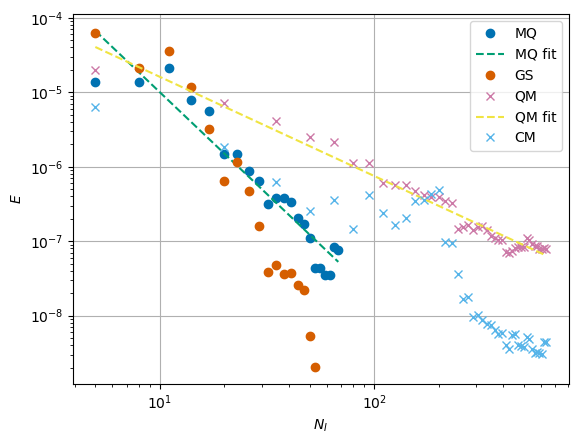

In [250]:
N_Is_mq = np.arange(5, 70, 3)
N_Is_gs = np.arange(5, 55, 3)
N_Is_m = np.arange(5, 650, 15)
u, f = func('u1')
err_mq = []
err_gs = []
err_qm = []
err_cm = []

for N_I in N_Is_mq:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym', 'MQ', 0.7, inte, bdy, err)
    err_mq.append(Error(u_approx))

for N_I in N_Is_gs:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym', 'GS', 0.7, inte, bdy, err)
    err_gs.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym', 'QM', 0.7, inte, bdy, err)
    err_qm.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym', 'CM', 0.7, inte, bdy, err)
    err_cm.append(Error(u_approx))

c_s = np.polyfit(np.log(N_Is_mq), np.log(err_mq), 1)
poly_c = np.poly1d(c_s)

c_s_qm = np.polyfit(np.log(N_Is_m), np.log(err_qm), 1)
poly_c_qm = np.poly1d(c_s_qm)

plt.plot(N_Is_mq, err_mq, linestyle = 'none', marker = 'o', label = 'MQ');
plt.plot(N_Is_mq, np.exp(poly_c(np.log(N_Is_mq))), linestyle = '--', label = 'MQ fit');
plt.plot(N_Is_gs, err_gs, linestyle = 'none', marker = 'o', label = 'GS');
plt.plot(N_Is_m, err_qm, linestyle = 'none', marker = 'x', label = 'QM');
plt.plot(N_Is_m, np.exp(poly_c_qm(np.log(N_Is_m))), linestyle = '--', label = 'QM fit');
plt.plot(N_Is_m, err_cm, linestyle = 'none', marker = 'x', label = 'CM');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$N_I$')
plt.ylabel(r'$E$')
plt.legend();
print('MQ: E(N)=exp({})N^({})'.format(c_s[1], c_s[0]))
print('QM: E(N)=exp({})N^({})'.format(c_s_qm[1], c_s_qm[0]))

### Kansa's symmetric method

MQ: E(N)=exp(-3.727441823118908)N^(-3.2689936907414068)
QM: E(N)=exp(-6.000458699669108)N^(-1.4835886546406805)


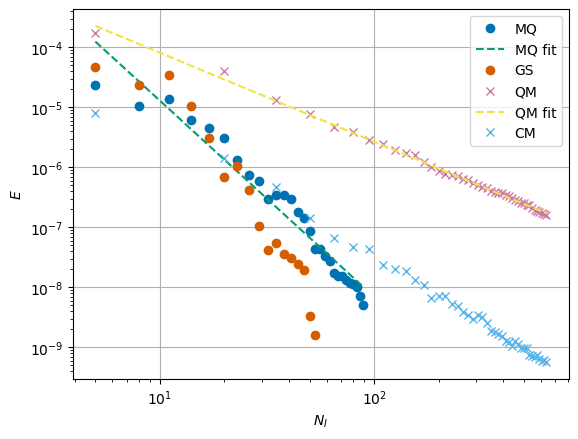

In [252]:
N_Is_mq = np.arange(5, 90, 3)
N_Is_gs = np.arange(5, 55, 3)
N_Is_m = np.arange(5, 650, 15)
u, f = func('u1')
err_mq = []
err_gs = []
err_qm = []
err_cm = []

for N_I in N_Is_mq:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('sym', 'MQ', 0.7, inte, bdy, err)
    err_mq.append(Error(u_approx))

for N_I in N_Is_gs:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('sym', 'GS', 0.7, inte, bdy, err)
    err_gs.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('sym', 'QM', 0.7, inte, bdy, err)
    err_qm.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, trash, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('sym', 'CM', 0.7, inte, bdy, err)
    err_cm.append(Error(u_approx))

c_s = np.polyfit(np.log(N_Is_mq), np.log(err_mq), 1)
poly_c = np.poly1d(c_s)

c_s_qm = np.polyfit(np.log(N_Is_m), np.log(err_qm), 1)
poly_c_qm = np.poly1d(c_s_qm)

plt.plot(N_Is_mq, err_mq, linestyle = 'none', marker = 'o', label = 'MQ');
plt.plot(N_Is_mq, np.exp(poly_c(np.log(N_Is_mq))), linestyle = '--', label = 'MQ fit');
plt.plot(N_Is_gs, err_gs, linestyle = 'none', marker = 'o', label = 'GS');
plt.plot(N_Is_m, err_qm, linestyle = 'none', marker = 'x', label = 'QM');
plt.plot(N_Is_m, np.exp(poly_c_qm(np.log(N_Is_m))), linestyle = '--', label = 'QM fit');
plt.plot(N_Is_m, err_cm, linestyle = 'none', marker = 'x', label = 'CM');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$N_I$')
plt.ylabel(r'$E$')
plt.legend();
print('MQ: E(N)=exp({})N^({})'.format(c_s[1], c_s[0]))
print('QM: E(N)=exp({})N^({})'.format(c_s_qm[1], c_s_qm[0]))

### Kansa's unsymmetric method with center points

MQ: E(N)=exp(-4.4479628718433855)N^(-3.4811029033820806)
QM: E(N)=exp(-8.008873918547401)N^(-1.8984342902513756)


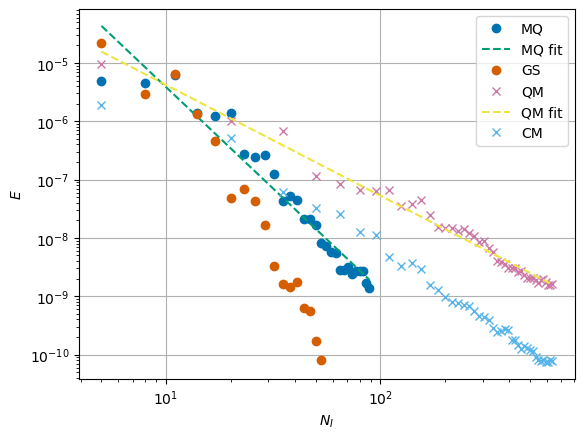

In [254]:
N_Is_mq = np.arange(5, 90, 3)
N_Is_gs = np.arange(5, 55, 3)
N_Is_m = np.arange(5, 650, 15)
u, f = func('u1')
err_mq = []
err_gs = []
err_qm = []
err_cm = []

for N_I in N_Is_mq:
    inte, bdy, cnt, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym_cnt', 'MQ', 0.7, inte, bdy, err, cnt)
    err_mq.append(Error(u_approx))

for N_I in N_Is_gs:
    inte, bdy, cnt, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym_cnt', 'GS', 0.7, inte, bdy, err, cnt)
    err_gs.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, cnt, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym_cnt', 'QM', 0.7, inte, bdy, err, cnt)
    err_qm.append(Error(u_approx))

for N_I in N_Is_m:
    inte, bdy, cnt, err = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = kansa('unsym_cnt', 'CM', 0.7, inte, bdy, err, cnt)
    err_cm.append(Error(u_approx))

c_s = np.polyfit(np.log(N_Is_mq), np.log(err_mq), 1)
poly_c = np.poly1d(c_s)

c_s_qm = np.polyfit(np.log(N_Is_m), np.log(err_qm), 1)
poly_c_qm = np.poly1d(c_s_qm)

plt.plot(N_Is_mq, err_mq, linestyle = 'none', marker = 'o', label = 'MQ');
plt.plot(N_Is_mq, np.exp(poly_c(np.log(N_Is_mq))), linestyle = '--', label = 'MQ fit');
plt.plot(N_Is_gs, err_gs, linestyle = 'none', marker = 'o', label = 'GS');
plt.plot(N_Is_m, err_qm, linestyle = 'none', marker = 'x', label = 'QM');
plt.plot(N_Is_m, np.exp(poly_c_qm(np.log(N_Is_m))), linestyle = '--', label = 'QM fit');
plt.plot(N_Is_m, err_cm, linestyle = 'none', marker = 'x', label = 'CM');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$N_I$')
plt.ylabel(r'$E$')
plt.legend();
print('MQ: E(N)=exp({})N^({})'.format(c_s[1], c_s[0]))
print('QM: E(N)=exp({})N^({})'.format(c_s_qm[1], c_s_qm[0]))

Note: \
While the Gauss RBF has the quickest falling error $E(N_I)$ for all the Kansa's methods it is also the one which becomes ill-conditioned the quickest ($N_I>58$ for Kansa's unsymmetric Method without center points). \
Therefore we choose the MQ RBF for any following application. \
As can be seen, for the Kansa's methods the MQ RBF has comparabely good convergence behaviour while staying well-posed longer than the Gauss RBF.

### RBF-FD

MQ: E(N)=exp(3.8401432744514)N^(-4.438364902114518)
QM: E(N)=exp(0.379211713395904)N^(-3.2178134016744693)


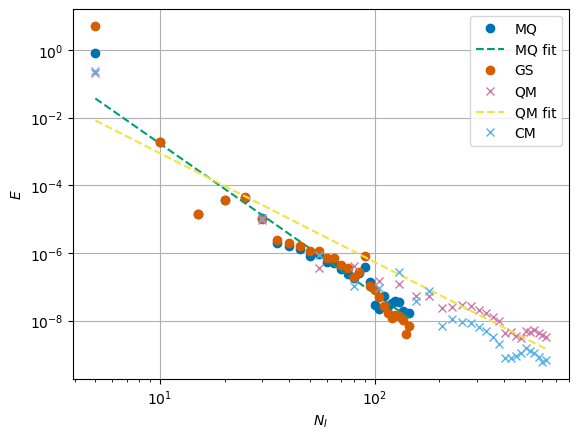

In [260]:
N_Is_mq = np.arange(5, 150, 5)
N_Is_qm = np.arange(5, 650, 25)
u, f = func('u1')
err_mq = []
err_gs = []
err_qm = []
err_cm = []

for N_I in N_Is_mq:
    inte, bdy, trash, trash = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = rbf_fd('MQ', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
    err = np.copy(inte)
    err_mq.append(Error(u_approx))

for N_I in N_Is_mq:
    inte, bdy, trash, trash = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = rbf_fd('GS', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
    err = np.copy(inte)
    err_gs.append(Error(u_approx))

for N_I in N_Is_qm:
    inte, bdy, trash, trash = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = rbf_fd('QM', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
    err = np.copy(inte)
    err_qm.append(Error(u_approx))

for N_I in N_Is_qm:
    inte, bdy, trash, trash = domain('ud', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000)
    u_approx = rbf_fd('CM', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
    err = np.copy(inte)
    err_cm.append(Error(u_approx))

c_s = np.polyfit(np.log(N_Is_mq), np.log(err_mq), 1)
poly_c = np.poly1d(c_s)

c_s_qm = np.polyfit(np.log(N_Is_qm), np.log(err_qm), 1)
poly_c_qm = np.poly1d(c_s_qm)

plt.plot(N_Is_mq, err_mq, linestyle = 'none', marker = 'o', label = 'MQ');
plt.plot(N_Is_mq, np.exp(poly_c(np.log(N_Is_mq))), linestyle = '--', label = 'MQ fit');
plt.plot(N_Is_mq, err_gs, linestyle = 'none', marker = 'o', label = 'GS');
plt.plot(N_Is_qm, err_qm, linestyle = 'none', marker = 'x', label = 'QM');
plt.plot(N_Is_qm, np.exp(poly_c_qm(np.log(N_Is_qm))), linestyle = '--', label = 'QM fit');
plt.plot(N_Is_qm, err_cm, linestyle = 'none', marker = 'x', label = 'CM');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$N_I$')
plt.ylabel(r'$E$')
plt.legend();
print('MQ: E(N)=exp({})N^({})'.format(c_s[1], c_s[0]))
print('QM: E(N)=exp({})N^({})'.format(c_s_qm[1], c_s_qm[0]))

Note: \
For the RBF-FD method there is only little difference in convergence behaviour depending on the used RBF. \
Still we will choose the MQ RBF for any following application.

## Shape parameter $\epsilon$
One can imagine, that it is more beneficial for the RBF to be sharper or broader depending on the amount of points $N$ or rather the average distance of these points. \
Our hypthesis would be, that with the average distance of points decreasing, i.e. $N$ increasing, the most beneficial RBF becomes sharper. \
Note, that the MQ RBF becomes sharper with increasing $\epsilon$. \
Our goal is to approximate the average distance of poinst by their number $N$ and find the behaviour $\epsilon(N)$. \
To get a first grasp on the behaviour depending on the shape parameter we consider the error $E$ depending on $\epsilon$ for all Kansa's methods and RBF-FD for $N_I=50$ and $N_B=20$.

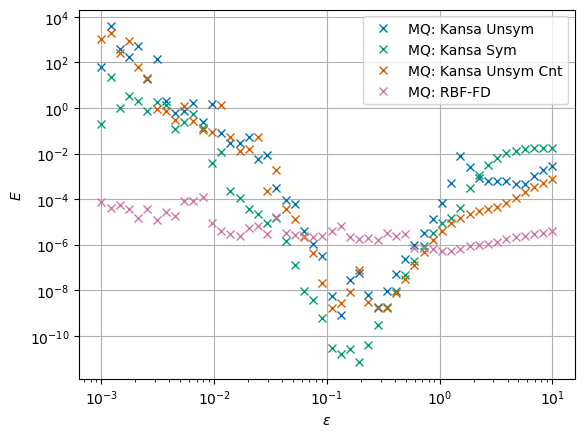

In [535]:
eps = np.logspace(-3, 1, 50)
u, f = func('u1')
err_1 = []
err_2 = []
err_3 = []
err_fd = []

inte, bdy, cnt, err = domain('ud', 50, 20, 0.5, 10000)

for e in eps:
    u_approx = kansa('unsym', 'MQ', e, inte, bdy, err)
    err_1.append(Error(u_approx))

    u_approx = kansa('sym', 'MQ', e, inte, bdy, err)
    err_2.append(Error(u_approx))
    
    u_approx = kansa('unsym_cnt', 'MQ', e, inte, bdy, err, cnt)
    err_3.append(Error(u_approx))
    
    u_approx = rbf_fd('MQ', inte, bdy, 2, 10, e)
    err = np.copy(inte)
    err_fd.append(Error(u_approx))

plt.plot(eps, err_1, linestyle = 'none', marker = 'x', label = 'MQ: Kansa Unsym');
plt.plot(eps, err_2, linestyle = 'none', marker = 'x', label = 'MQ: Kansa Sym');
plt.plot(eps, err_3, linestyle = 'none', marker = 'x', label = 'MQ: Kansa Unsym Cnt');
plt.plot(eps, err_fd, linestyle = 'none', marker = 'x', label = 'MQ: RBF-FD');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$E$')
plt.legend();

And the same for the comparison of the MQ RBF and Gauss RBF.

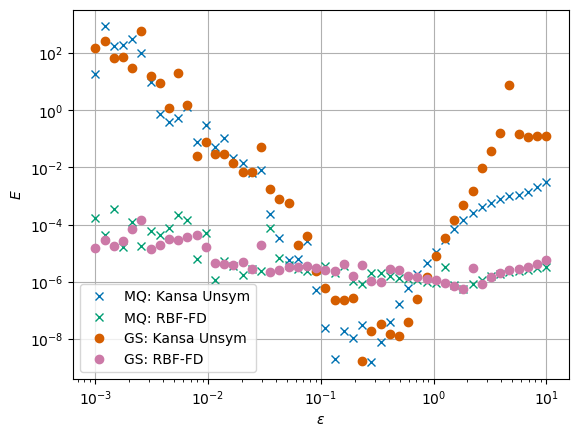

In [536]:
eps = np.logspace(-3, 1, 50)
u, f = func('u1')
err_1 = []
err_fd = []

err_1_gs = []
err_fd_gs = []

inte, bdy, cnt, err = domain('ud', 50, 20, 0.5, 10000)

for e in eps:
    u_approx = kansa('unsym', 'MQ', e, inte, bdy, err)
    err_1.append(Error(u_approx))
    u_approx = kansa('unsym', 'GS', e, inte, bdy, err)
    err_1_gs.append(Error(u_approx))
    
    u_approx = rbf_fd('MQ', inte, bdy, 2, 10, e)
    err = np.copy(inte)
    err_fd.append(Error(u_approx))
    u_approx = rbf_fd('GS', inte, bdy, 2, 10, e)
    err_fd_gs.append(Error(u_approx))

plt.plot(eps, err_1, linestyle = 'none', marker = 'x', label = 'MQ: Kansa Unsym');
plt.plot(eps, err_fd, linestyle = 'none', marker = 'x', label = 'MQ: RBF-FD');
plt.plot(eps, err_1_gs, linestyle = 'none', marker = 'o', label = 'GS: Kansa Unsym');
plt.plot(eps, err_fd_gs, linestyle = 'none', marker = 'o', label = 'GS: RBF-FD');
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$E$')
plt.legend();

Note: \
Since we can see, that the Gauss RBF and MQ RBF behave very similar it is still sufficient to consider only the MQ RBF for the shape parameter. \
Also we can see, that the error of the RBF-FD method depends very little on the shape parameter, s.t. there isn't really an optimal shape parameter and any $\epsilon$ from a wide range is fine to achieve next to optimal results. \
Furthermore we can see, that all the Kansa's methods behave also quite similarly and we assume this behaviour is kept over various $N$ \
Therefore we will evaluate $\epsilon(N)$ only for the unsymmetric Kansa's method for the MQ RBF. \
For this we fit (polynomial of degree 20 with logarithmic scaling) to $E(\epsilon)$ and determine the minimum for a range of $N$. With this we fit (linearly) $\epsilon(N_I)$. \
$N_B$ is scaled to $N_I$ as before.

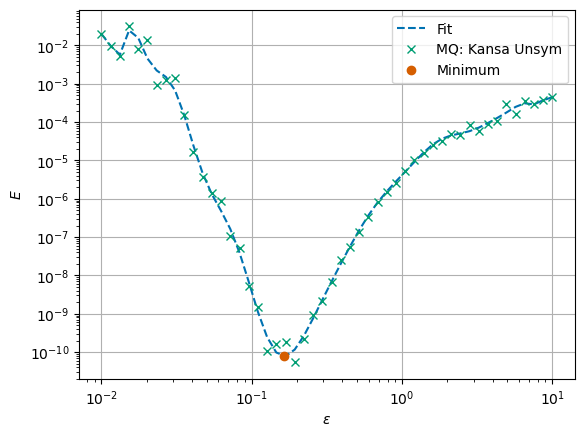

In [520]:
eps = np.logspace(-2, 1, 50)
u, f = func('u1')
err_t = []
N_Er = 50

for e in eps:
    err_1 = []
    for i in range(N_Er):
        inte, bdy, cnt, err = domain('ud', 30, 20, 0.5, 10000, int((e + i) * 100))
        u_approx = kansa('unsym', 'MQ', e, inte, bdy, err)
        err_1.append(Error(u_approx))
    err_t.append(np.mean(err_1))

c_E_t = np.polyfit(np.log(eps), np.log(err_t), 20)
poly_c_E = np.poly1d(c_E_t)

fit = minimize(poly_c_E, x0 = eps[np.argmin(err_t)])

plt.plot(eps, np.exp(poly_c_E(np.log(eps))), linestyle = '--', label = 'Fit');

plt.plot(eps, np.array(err_t), linestyle = 'none', marker = 'x', label = 'MQ: Kansa Unsym');
plt.plot([np.exp(fit.x)], [np.exp(poly_c_E(fit.x))], linestyle = 'none', marker = 'o', label = 'Minimum')
plt.yscale('log')
plt.xscale('log');
plt.grid(True);
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$E$')
plt.legend();

[0.00415615]x+[0.06342698]


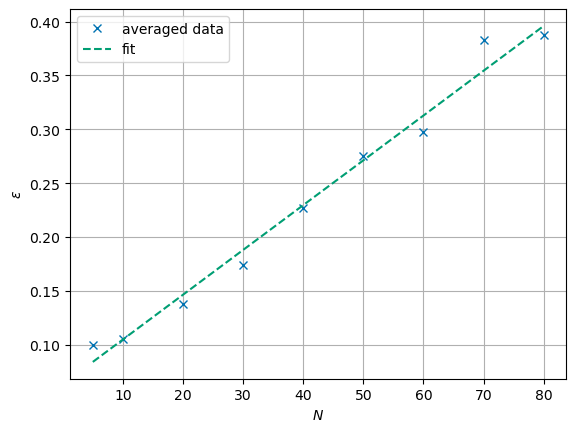

In [591]:
eps = np.logspace(-3, 1.5, 50)
u, f = func('u1')
N_Er = 50
N_s = [5, 10, 20, 30, 40, 50, 60, 70, 80]
E_mins = []

for N_c in N_s:
    err_t = []
    for e in eps:
        err_1 = []
        for i in range(N_Er):
            inte, bdy, cnt, err = domain('ud', N_c, int(2 * np.log(N_c)) + 20, 0.5, 10000, int((e + i) * 100))
            u_approx = kansa('unsym', 'MQ', e, inte, bdy, err)
            err_1.append(Error(u_approx))
        err_t.append(np.mean(err_1))

    c_E_t = np.polyfit(np.log(eps), np.log(err_t), 20)
    poly_c_E = np.poly1d(c_E_t)
    
    fit = minimize(poly_c_E, x0 = eps[np.argmin(err_t)])
    E_mins.append(np.exp(fit.x))

c_N = np.polyfit(N_s, E_mins, 1)
poly_c_N = np.poly1d(c_N.flatten())

print('{}x+{}'.format(c_N[0][0], c_N[1][0]))

plt.plot(N_s, E_mins, linestyle = 'none', marker = 'x', label = 'averaged data')
plt.plot(N_s, poly_c_N(N_s), linestyle = '--', label = 'fit')
plt.grid(True);
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'$N$')
plt.legend();

This proves our hypothesis, as the MQ RBF becomes sharper with increasing $\epsilon$.

### Cauchy-Technique

## Behaviour around singularities

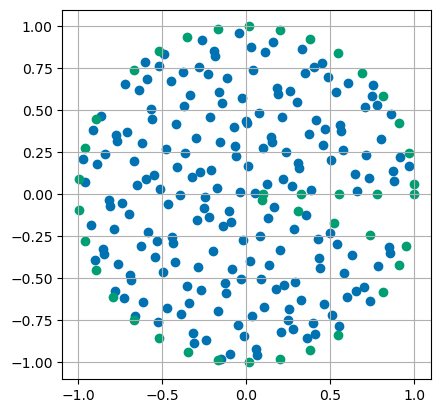

In [538]:
inn, bd, err = domain('pacman', 200, 40, 0.5, 10000, alpha = 1.9, seed_ = 129)

fig, ax = plt.subplots()
plt.scatter(inn.T[0], inn.T[1]);
plt.scatter(bd.T[0], bd.T[1]);
ax.set_aspect('equal');
plt.grid(True);

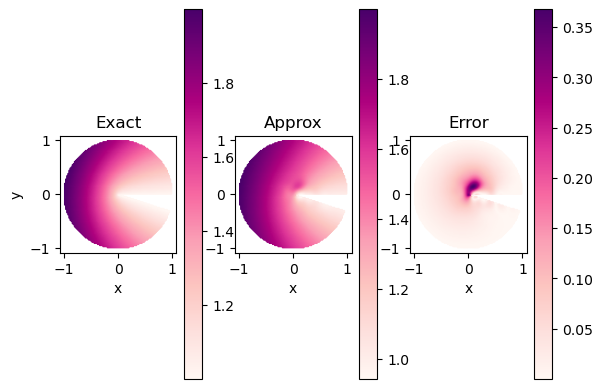

In [540]:
u, f = func('singular', 1.9)

u_approx = kansa('unsym', 'QM', 0.7, inn, bd, err)

Err = np.absolute(u_approx - u(err.T[0], err.T[1]))

cmap = plt.get_cmap('RdPu')

fig, axs = plt.subplots(1, 3);
p = axs[0].scatter(err.T[0], err.T[1], c = u(err.T[0], err.T[1]) , cmap=cmap, s = 0.5, marker = 'p');
p1 = axs[1].scatter(err.T[0], err.T[1], c = u_approx , cmap=cmap, s = 0.5, marker = 'p');
p2 = axs[2].scatter(err.T[0], err.T[1], c = Err , cmap=cmap, s = 0.5, marker = 'p');
fig.colorbar(p);
fig.colorbar(p1);
fig.colorbar(p2);

axs[0].set_title("Exact");
axs[1].set_title("Approx");
axs[2].set_title("Error");

for ax in axs.flatten():
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_aspect('equal');
    
plt.show();

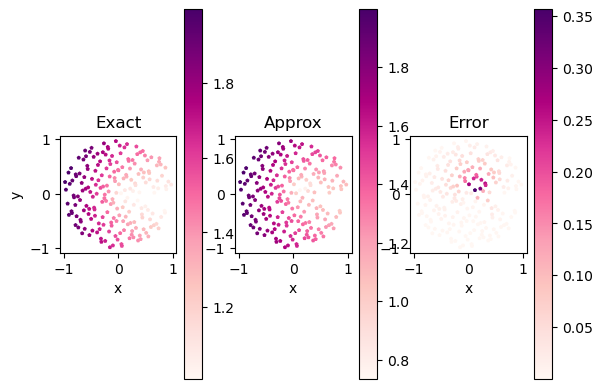

In [542]:
u, f = func('singular', 1.9)

u_approx = rbf_fd('MQ', inn, bd, 2, 10, 0.7).reshape((inn.shape[0], 1))

Err = np.absolute(u_approx - u(inn.T[0], inn.T[1]))

cmap = plt.get_cmap('RdPu')

fig, axs = plt.subplots(1, 3);
p = axs[0].scatter(inn.T[0], inn.T[1], c = u(inn.T[0], inn.T[1]) , cmap=cmap, s = 4, marker = 'p');
p1 = axs[1].scatter(inn.T[0], inn.T[1], c = u_approx , cmap=cmap, s = 4, marker = 'p');
p2 = axs[2].scatter(inn.T[0], inn.T[1], c = Err , cmap=cmap, s = 4, marker = 'p');
fig.colorbar(p);
fig.colorbar(p1);
fig.colorbar(p2);

axs[0].set_title("Exact");
axs[1].set_title("Approx");
axs[2].set_title("Error");

for ax in axs.flatten():
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    ax.set_aspect('equal');
    
plt.show();

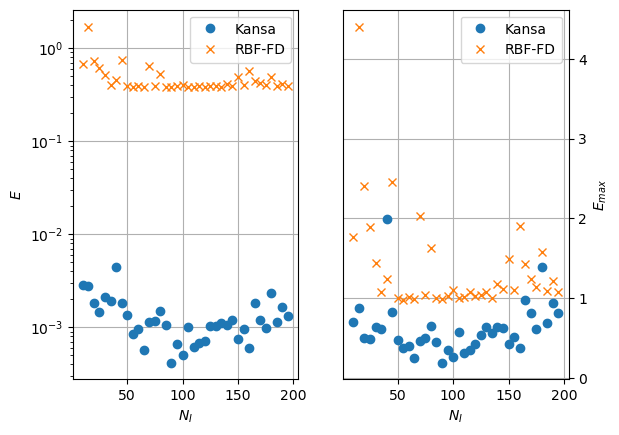

In [341]:
N_Is = np.arange(10, 200, 5)
u, f = func('singular', alpha = 1.9)
err_kansa = []
err_fd = []
err_kansa_max = []
err_fd_max = []


for N_I in N_Is:
    err_kansa_ = []
    err_fd_ = []
    err_kansa_max_ = []
    err_fd_max_ = []
    for i in range(30):
        inte, bdy, err = domain('pacman', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000, alpha = 1.9, \
                                seed_ = int(N_I + i * 10 + np.log(i * 100 + 1)))
        u_approx = kansa('unsym', 'QM', 0.7, inte, bdy, err)
        err_kansa_.append(Error(u_approx))
        err_kansa_max_.append(E_max(u_approx))
        u_approx = rbf_fd('QM', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
        err = np.copy(inte)
        err_fd_.append(Error(u_approx))
        err_fd_max_.append(E_max(u_approx))
    err_kansa.append(np.mean(err_kansa_))
    err_fd.append(np.mean(err_fd_))
    err_kansa_max.append(np.mean(err_kansa_max_))
    err_fd_max.append(np.mean(err_fd_max_))

fig, axs = plt.subplots(1, 2);
axs[0].plot(N_Is, err_kansa, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[0].plot(N_Is, err_fd, linestyle = 'none', marker = 'x', label = 'RBF-FD');
axs[1].plot(N_Is, err_kansa_max, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[1].plot(N_Is, err_fd_max, linestyle = 'none', marker = 'x', label = 'RBF-FD');

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

axs[0].set_ylabel(r'$E$')
axs[1].set_ylabel(r'$E_{max}$')
axs[0].set_yscale('log')

for ax in axs.flatten():
    #ax.set_xscale('log');
    ax.grid(True);
    ax.set_xlabel(r'$N_I$')
    ax.legend();

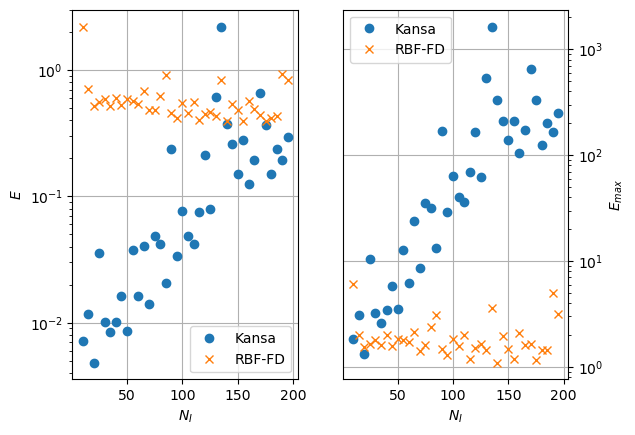

In [329]:
N_Is = np.arange(10, 200, 5)
u, f = func('singular', alpha = 1.9)
err_kansa = []
err_fd = []
err_kansa_max = []
err_fd_max = []


for N_I in N_Is:
    err_kansa_ = []
    err_fd_ = []
    err_kansa_max_ = []
    err_fd_max_ = []
    for i in range(30):
        inte, bdy, err = domain('pacman', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000, alpha = 1.9, \
                                seed_ = int(N_I + i * 10 + np.log(i * 100 + 1) + 2))
        u_approx = kansa('unsym', 'MQ', 0.7, inte, bdy, err)
        err_kansa_.append(Error(u_approx))
        err_kansa_max_.append(E_max(u_approx))
        u_approx = rbf_fd('MQ', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
        err = np.copy(inte)
        err_fd_.append(Error(u_approx))
        err_fd_max_.append(E_max(u_approx))
    err_kansa.append(np.mean(err_kansa_))
    err_fd.append(np.mean(err_fd_))
    err_kansa_max.append(np.mean(err_kansa_max_))
    err_fd_max.append(np.mean(err_fd_max_))

fig, axs = plt.subplots(1, 2);
axs[0].plot(N_Is, err_kansa, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[0].plot(N_Is, err_fd, linestyle = 'none', marker = 'x', label = 'RBF-FD');
axs[1].plot(N_Is, err_kansa_max, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[1].plot(N_Is, err_fd_max, linestyle = 'none', marker = 'x', label = 'RBF-FD');

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

axs[0].set_ylabel(r'$E$')
axs[1].set_ylabel(r'$E_{max}$')

for ax in axs.flatten():
    ax.set_yscale('log')
    #ax.set_xscale('log');
    ax.grid(True);
    ax.set_xlabel(r'$N_I$')
    ax.legend();

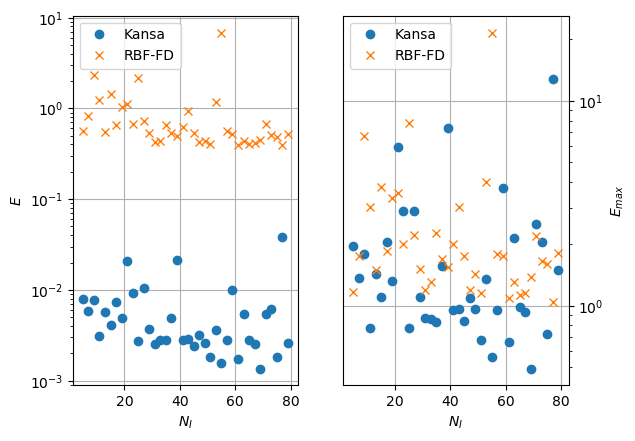

In [334]:
N_Is = np.arange(5, 80, 2)
u, f = func('singular', alpha = 1.9)
err_kansa = []
err_fd = []
err_kansa_max = []
err_fd_max = []


for N_I in N_Is:
    err_kansa_ = []
    err_fd_ = []
    err_kansa_max_ = []
    err_fd_max_ = []
    for i in range(30):
        inte, bdy, err = domain('pacman', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000, alpha = 1.9, \
                                seed_ = int(N_I + i * 10 + np.log(i * 100 + 1)))
        u_approx = kansa('unsym', 'CM', 0.7, inte, bdy, err)
        err_kansa_.append(Error(u_approx))
        err_kansa_max_.append(E_max(u_approx))
        u_approx = rbf_fd('CM', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
        err = np.copy(inte)
        err_fd_.append(Error(u_approx))
        err_fd_max_.append(E_max(u_approx))
    err_kansa.append(np.mean(err_kansa_))
    err_fd.append(np.mean(err_fd_))
    err_kansa_max.append(np.mean(err_kansa_max_))
    err_fd_max.append(np.mean(err_fd_max_))

fig, axs = plt.subplots(1, 2);
axs[0].plot(N_Is, err_kansa, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[0].plot(N_Is, err_fd, linestyle = 'none', marker = 'x', label = 'RBF-FD');
axs[1].plot(N_Is, err_kansa_max, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[1].plot(N_Is, err_fd_max, linestyle = 'none', marker = 'x', label = 'RBF-FD');

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

axs[0].set_ylabel(r'$E$')
axs[1].set_ylabel(r'$E_{max}$')

for ax in axs.flatten():
    ax.set_yscale('log')
    #ax.set_xscale('log');
    ax.grid(True);
    ax.set_xlabel(r'$N_I$')
    ax.legend();

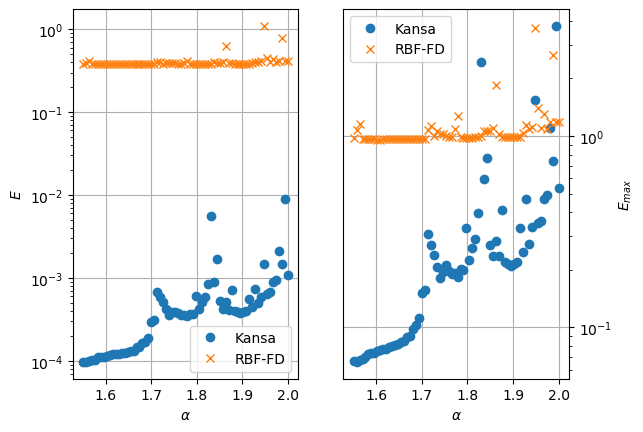

In [343]:
alphas = np.linspace(1.55, 1.9999, 70)
N_I = 100
err_kansa = []
err_fd = []
err_kansa_max = []
err_fd_max = []


for alp in alphas:
    err_kansa_ = []
    err_fd_ = []
    err_kansa_max_ = []
    err_fd_max_ = []
    for i in range(20):
        u, f = func('singular', alpha = alp)
        inte, bdy, err = domain('pacman', N_I, int(2 * np.log(N_I)) + 20, 0.5, 10000, alpha = alp, \
                                seed_ = int(N_I + i * 10 + np.log(i * 100 + 1) + 1))
        u_approx = kansa('unsym', 'QM', 0.7, inte, bdy, err)
        err_kansa_.append(Error(u_approx))
        err_kansa_max_.append(E_max(u_approx))
        u_approx = rbf_fd('QM', inte, bdy, 2, int(N_I / 10) + 5, 0.7)
        err = np.copy(inte)
        err_fd_.append(Error(u_approx))
        err_fd_max_.append(E_max(u_approx))
    err_kansa.append(np.mean(err_kansa_))
    err_fd.append(np.mean(err_fd_))
    err_kansa_max.append(np.mean(err_kansa_max_))
    err_fd_max.append(np.mean(err_fd_max_))

fig, axs = plt.subplots(1, 2);
axs[0].plot(alphas, err_kansa, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[0].plot(alphas, err_fd, linestyle = 'none', marker = 'x', label = 'RBF-FD');
axs[1].plot(alphas, err_kansa_max, linestyle = 'none', marker = 'o', label = 'Kansa');
axs[1].plot(alphas, err_fd_max, linestyle = 'none', marker = 'x', label = 'RBF-FD');

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

axs[0].set_ylabel(r'$E$')
axs[1].set_ylabel(r'$E_{max}$')

for ax in axs.flatten():
    ax.set_yscale('log')
    #ax.set_xscale('log');
    ax.grid(True);
    ax.set_xlabel(r'$\alpha$')
    ax.legend();

# Time dependent problem
For the first to test problems, i.e. transport and heat equation we consider the following IVP
$$
\begin{cases}
\mathcal{L}u = 0 \qquad & \text{in}\,\mathbb{R}^d\times[0,\infty) \\
u = g(x) \qquad & \text{on}\,\mathbb{R}^d\times\{t=0\}
\end{cases}
$$
where $d$ is the dimension and we set the initial value to be
$$
g(x) = e^{-x^2}
$$
Note: \
By taking the computation time into account we choose to use Kansa's methods for any time dependent application. \
Since each Kansa's methods is distinguished by how they deal with the boundary and we don't have a boundary value, they boil down to just one method, which will be elaborated on for each test case.

In [398]:
def g(x):
    return np.exp(-np.linalg.norm(x, axis = 1) ** 2)

## Example: Transport equation
The differential operator for the transport equation reads
$$
\mathcal{L}=\frac{\partial}{\partial t}+\alpha\nabla
$$
For this test case we will set the propagation speed $\alpha:= 1$. \
We define a grid on the time axis
$$
t^i:=i\cdot\delta t
$$
with $i=0,...,N_T$, where $N_T$ is defined by $\text{int}(\frac{T}{\delta t})$ and write
$$
u(x,t^i):=u^i(x)
$$
where $u^0(x)=g(x)$. \
Using the Euler finite difference scheme (forward in time) for the time direction, we can approximate
$$
\frac{\partial}{\partial t}\approx \frac{u^{i+1}-u^i}{\delta t}.
$$
Plugged into the PDE this yields
$$
u^{i+1}=u^i-\delta t \nabla u^i.
$$
Where $u^i$ is known, s.t. the coefficients $\lambda=(\lambda_1,...,\lambda_N)^\top$ in
$$
u^i(x)\approx\sum^N_{i=1}\lambda_i\phi(||x-x_i||,\epsilon)
$$
can be easily calculated by using the matrix form of this system of equations with
$$
A=
\begin{bmatrix}
\phi(||x_{1}-x_1||, \epsilon) & \phi(||x_{1}-x_2||, \epsilon) & \dots & \phi(||x_{1}-x_N||, \epsilon) \\
\phi(||x_{2}-x_1||, \epsilon) & \phi(||x_{2}-x_2||, \epsilon) & \dots & \phi(||x_{2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\phi(||x_N-x_1||, \epsilon) & \phi(||x_N-x_2||, \epsilon) & \dots & \phi(||x_N-x_N||, \epsilon)
\end{bmatrix}
$$
and $u^i=(u^i(x_1),...,u^i(x_N))^\top$. \
This yields
$$
\lambda=A^{-1}u^i.
$$
$u^{i+1}=(u^{i+1}(x_1),...,u^{i+1}(x_N))^\top$ can then be computed by
$$
u^{i+1}=u^i-\delta t B \cdot \lambda
$$
with 
$$
B=
\begin{bmatrix}
\nabla\phi(||x_{1}-x_1||, \epsilon) & \nabla\phi(||x_{1}-x_2||, \epsilon) & \dots & \nabla\phi(||x_{1}-x_N||, \epsilon) \\
\nabla\phi(||x_{2}-x_1||, \epsilon) & \nabla\phi(||x_{2}-x_2||, \epsilon) & \dots & \nabla\phi(||x_{2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\nabla\phi(||x_N-x_1||, \epsilon) & \nabla\phi(||x_N-x_2||, \epsilon) & \dots & \nabla\phi(||x_N-x_N||, \epsilon)
\end{bmatrix}.
$$
Note: \
The Euler scheme is in general unstable and can only yield good results for a specific time frame and for specific values of $\delta t$ and points $x_i$. \
To test this computation scheme we choose $d = 1$ and an equidistant distribution of points $x_i\in[-10,10]$. \
The exact solution to the transport equation is given by
$$
u_{\text{exact}}=g(x-t).
$$

In [400]:
x, r, e = symbols('x r e')
dxphi = lambdify([x, e], simplify(diff(phi_sp('MQ', r, e).subs(r, x), x)))

def kansaTransport(str_type_phi, e, inte, dt, T):
    dm_int = distance_matrix(inte, inte)

    N_T = int(np.ceil(T / dt))

    u_approx = []
    u_c = g(inte)
    u_approx.append(u_c)

    for i in range(N_T):
        A = phi(str_type_phi, dm_int, e)
        lam = linalg.solve(A, u_c)
        B = np.zeros((dx, dx))
        for i in range(dx):
            for j in range(dx):
                B[i][j] = -dxphi(inte[i] - inte[j], e)[0]
        Lu = np.dot(B, lam)
        u_c = np.copy(u_c) + dt * Lu
        u_approx.append(u_c)
        

    return u_approx

In [402]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 2.5
N_T = int(np.ceil(T / dt))
dx = 100

xs_trans = np.linspace(-5, 15, dx).reshape((dx, 1))
u_approx_trans = kansaTransport('MQ', 0.7, xs_trans, dt, T)

def update_plot_trans(i = 0):
    fig = plt.figure()
    ax = plt.axes(xlim = (-5, 15), ylim = (-1, 1.5))
    ax.plot(xs_trans, u_approx_trans[i], lw = 2, linestyle = 'none', marker = 'x', label = 'approx')
    ax.plot(xs_trans, g(xs_trans - i * dt), label = 'exact')
    ax.set(xlabel = 'x', ylabel = r'$\hat{u}_t$')
    ax.set_title("t = {}".format(dt * i))
    ax.legend()

    fig.canvas.draw()
    
interact(update_plot_trans, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=249), Output()), _dom_classes=('widget-interact'…

## Example: Heat equation
The heat equation is given by
$$
\mathcal{L}=\frac{\partial}{\partial t}-\Delta.
$$
For the Euler scheme we consider an analogous approach to the transport equation and get
$$
u^{i+1}=u^i+\delta t B \cdot \lambda
$$
with 
$$
B=
\begin{bmatrix}
\Delta\phi(||x_{1}-x_1||, \epsilon) & \Delta\phi(||x_{1}-x_2||, \epsilon) & \dots & \Delta\phi(||x_{1}-x_N||, \epsilon) \\
\Delta\phi(||x_{2}-x_1||, \epsilon) & \Delta\phi(||x_{2}-x_2||, \epsilon) & \dots & \Delta\phi(||x_{2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\Delta\phi(||x_N-x_1||, \epsilon) & \Delta\phi(||x_N-x_2||, \epsilon) & \dots & \Delta\phi(||x_N-x_N||, \epsilon)
\end{bmatrix}.
$$
Again we consider $d=1$ and equidistant $x_i\in[-10,10]$. \
The exact solution is given by 
$$
u_{\text{exact}}(x,t)=\frac{1}{\sqrt{4\pi t}}\int_{\mathbb{R}^d} e^{-\frac{||x-y||^2}{4 t}}g(y)dy.
$$

In [445]:
def kansaHeat(str_type_phi, e, inte, dt, T):
    dm_int = distance_matrix(inte, inte)

    N_T = int(np.ceil(T / dt))

    u_approx = []
    u_c = g(inte)
    u_approx.append(u_c)

    for i in range(N_T):
        A = phi(str_type_phi, dm_int, e)
        lam = linalg.solve(A, u_c)
        B = Lphi(str_type_phi, dm_int, e)
        Lu = np.dot(B, lam)
        u_c = np.copy(u_c) + dt * Lu
        u_approx.append(u_c)
        

    return u_approx

In [447]:
def kansaHeat_stable(str_type_phi, e, inte, dt, T):
    dm_int = distance_matrix(inte, inte)

    N_T = int(np.ceil(T / dt))

    u_approx = []
    u_c = g(inte)
    u_approx.append(u_c)
    lam = linalg.solve(phi(str_type_phi, dm_int, e), u_c)

    for i in range(N_T):
        A = phi(str_type_phi, dm_int, e) - dt / 2 * Lphi(str_type_phi, dm_int, e)
        B = phi(str_type_phi, dm_int, e) + dt / 2 * Lphi(str_type_phi, dm_int, e)
        lam = linalg.solve(A, np.dot(B, lam))
        u_c = np.dot(phi(str_type_phi, dm_int, e), lam)
        u_approx.append(u_c)
        

    return u_approx

In [414]:
def heat_kernel(x, t):
    return 1 / np.sqrt(4 * np.pi * t) * np.exp(- x ** 2 / (4 * t))

def heat_exact(xs, t):
    out = []
    for x in xs:
        if t > 0:
            ex_ = lambda y: heat_kernel(x - y, t) * np.exp(- y ** 2)
            out.append(integrate.quad(ex_, -np.inf, np.inf)[0])
        else:
            out.append(np.exp(- x ** 2))
    return out

In [455]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 2
N_T = int(np.ceil(T / dt))
dx = 50

xs_heat = np.linspace(-10, 10, dx).reshape((dx, 1))
xs_heat_2 = np.linspace(-10, 10, 200).reshape((200, 1))
u_approx_heat = kansaHeat('MQ', 0.7, xs_heat, dt, T)

def update_plot(i = 0):
    fig = plt.figure()
    ax = plt.axes(xlim = (-10, 10), ylim = (0, 1))
    ax.plot(xs_heat, u_approx_heat[i], lw = 2, linestyle = 'none', marker = 'x', label = 'approx')
    ax.plot(xs_heat_2, heat_exact(xs_heat_2, i * dt), label = 'exact')
    ax.set(xlabel = 'x', ylabel = r'$\hat{u}_t$')
    ax.set_title("t = {}".format(dt * i))
    ax.legend()

    fig.canvas.draw()
    
interact(update_plot, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

And another test case for $d = 2$ and an equidistant meshgrid $x_i\in[-8,8]\times [-8,8]$.

In [510]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 2
N_T = int(np.ceil(T / dt))
dx = 50

xs_3d, ys_3d = np.meshgrid(np.linspace(-8, 8, dx), np.linspace(-8, 8, dx))
ps_3d = np.asarray([xs_3d.flatten(), ys_3d.flatten()])
u_approx_3d = kansaHeat('MQ', 0.7, ps_3d.T, dt, T)

cm = plt.get_cmap('RdPu')

def update_plot_3d(i = 0):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(0, 1)
    ax.scatter(xs_3d.flatten(), ys_3d.flatten(), u_approx_3d[i], c = u_approx_3d[i], cmap = cm)
    ax.set(xlabel = 'x', ylabel = 'y', zlabel = r'$\hat{u}_t$')
    ax.set_title("t = {}".format(dt * i))

    fig.canvas.draw()

interact(update_plot_3d, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

Now so far these results seemed stable, but by e.g. just doubling the amount of points $x_i$ it already becomes unstable.

In [467]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 1
N_T = int(np.ceil(T / dt))
dx = 100

xs_heat_unstable = np.linspace(-10, 10, dx).reshape((dx, 1))
xs_heat_2 = np.linspace(-10, 10, 200).reshape((200, 1))
u_approx_heat_unstable = kansaHeat('MQ', 0.7, xs_heat_unstable, dt, T)

def update_plot(i = 0):
    fig = plt.figure()
    ax = plt.axes(xlim = (-10, 10), ylim = (0, 1))
    ax.plot(xs_heat_unstable, u_approx_heat_unstable[i], lw = 2, linestyle = 'none', marker = 'x', label = 'approx')
    ax.plot(xs_heat_2, heat_exact(xs_heat_2, i * dt), label = 'exact')
    ax.set(xlabel = 'x', ylabel = r'$\hat{u}_t$')
    ax.set_title("t = {}".format(dt * i))
    ax.legend()

    fig.canvas.draw()
    
interact(update_plot, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

To combat this we extend the Euler scheme according to the Crank-Nicolson, i.e. we replace $\Delta u^i$ by
$\Delta(\frac{1}{2}(u^{i+1}+u^i))$. \
Therefore the our scheme reads
$$
u^{i+1}=u^i+\delta t\Delta(\frac{1}{2}(u^{i+1}+u^i)).
$$
Which yields
$$
(1-\frac{1}{2}\Delta)u^{i+1}=(1+\frac{1}{2}\Delta)u^i.
$$
Now again we approximate $u^i$ by RBFs but this time write $\lambda^i$, i.e $\lambda$ as time dependent, s.t. we can also approximate $u^{i+1}$ in the same way. \
Writing the resulting system of equations in matrix form yields
$$
D\cdot\lambda^{i+1}=C\cdot\lambda^{i}
$$
with 
$$
D=
\begin{bmatrix}
\phi(||x_{1}-x_1||, \epsilon) - \Delta\phi(||x_{1}-x_1||, \epsilon) & \phi(||x_{1}-x_2||, \epsilon)-\Delta\phi(||x_{1}-x_2||, \epsilon) & \dots & \phi(||x_{1}-x_N||, \epsilon)-\Delta\phi(||x_{1}-x_N||, \epsilon) \\
\phi(||x_{2}-x_1||, \epsilon)-\Delta\phi(||x_{2}-x_1||, \epsilon) & \phi(||x_{2}-x_2||, \epsilon)-\Delta\phi(||x_{2}-x_2||, \epsilon) & \dots & \phi(||x_{2}-x_N||, \epsilon)-\Delta\phi(||x_{2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\phi(||x_N-x_1||, \epsilon)-\Delta\phi(||x_N-x_1||, \epsilon) & \phi(||x_N-x_2||, \epsilon)-\Delta\phi(||x_N-x_2||, \epsilon) & \dots & \phi(||x_N-x_N||, \epsilon)-\Delta\phi(||x_N-x_N||, \epsilon)
\end{bmatrix}
$$
and
$$
C=
\begin{bmatrix}
\phi(||x_{1}-x_1||, \epsilon) + \Delta\phi(||x_{1}-x_1||, \epsilon) & \phi(||x_{1}-x_2||, \epsilon)+\Delta\phi(||x_{1}-x_2||, \epsilon) & \dots & \phi(||x_{1}-x_N||, \epsilon)+\Delta\phi(||x_{1}-x_N||, \epsilon) \\
\phi(||x_{2}-x_1||, \epsilon)+\Delta\phi(||x_{2}-x_1||, \epsilon) & \phi(||x_{2}-x_2||, \epsilon)+\Delta\phi(||x_{2}-x_2||, \epsilon) & \dots & \phi(||x_{2}-x_N||, \epsilon)+\Delta\phi(||x_{2}-x_N||, \epsilon) \\
\vdots & \vdots & \vdots & \vdots \\
\phi(||x_N-x_1||, \epsilon)+\Delta\phi(||x_N-x_1||, \epsilon) & \phi(||x_N-x_2||, \epsilon)+\Delta\phi(||x_N-x_2||, \epsilon) & \dots & \phi(||x_N-x_N||, \epsilon)+\Delta\phi(||x_N-x_N||, \epsilon)
\end{bmatrix}.
$$
As before we can calculate $\lambda^0$ from the initial value and compute $\lambda^{i+1}$ by
$$
\lambda^{i+1}=D^{-1}C\cdot\lambda^{i}.
$$
$u^{i+1}$ then follows from $\lambda^{i+1}$.

In [461]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 2
N_T = int(np.ceil(T / dt))
dx = 100

xs_heat_stable = np.linspace(-10, 10, dx).reshape((dx, 1))
xs_heat_2 = np.linspace(-10, 10, 200).reshape((200, 1))
u_approx_heat_stable = kansaHeat_stable('MQ', 0.7, xs_heat_stable, dt, T)

def update_plot(i = 0):
    fig = plt.figure()
    ax = plt.axes(xlim = (-10, 10), ylim = (0, 1))
    ax.plot(xs_heat_stable, u_approx_heat_stable[i], lw = 2, linestyle = 'none', marker = 'x', label = 'approx')
    ax.plot(xs_heat_2, heat_exact(xs_heat_2, i * dt), label = 'exact')
    ax.set(xlabel = 'x', ylabel = r'$\hat{u}_t$')
    ax.set_title("t = {}".format(dt * i))
    ax.legend()

    fig.canvas.draw()
    
interact(update_plot, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

# Application: Black-Scholes equation

In [567]:
r, e = symbols('r e')
dphi = lambdify([r, e], simplify(diff(phi_sp('MQ', r, e), r)))

def BSphi(r_, e_, ren, sig):
    return ren * phi('MQ', r_, e_) - ren * r_ * dphi(r_, e_) - 1 / 2 * (sig * r_) ** 2 * Lphi('MQ', r_, e_)

def kansaBlackScholes(e, inte, dt, T, ren, sig):
    dm_int = distance_matrix(inte, inte)

    N_T = int(np.ceil(T / dt))

    u_approx = []
    u_c = np.sin(inte) + 1
    u_approx.append(u_c)

    for i in range(N_T):
        A = phi('MQ', dm_int, e)
        lam = linalg.solve(A, u_c)
        B = BSphi(dm_int, e, ren, sig)
        Lu = np.dot(B, lam)
        u_c = np.copy(u_c) + dt * Lu
        u_approx.append(u_c)
        

    return u_approx

In [569]:
plt.style.use('seaborn-v0_8-colorblind')

dt = 0.01
T = 10
N_T = int(np.ceil(T / dt))
dx = 50

s_bs = np.linspace(0, 10, dx).reshape((dx, 1))
#s_bs_2 = np.linspace(0, 10, 200).reshape((200, 1))
u_approx_bs = kansaBlackScholes(0.7, s_bs, dt, T, 0.375, 0.1)

def update_plot(i = 0):
    fig = plt.figure()
    ax = plt.axes(xlim = (0, 10), ylim = (0, 2))
    ax.plot(s_bs, u_approx_bs[i], lw = 2, linestyle = 'none', marker = 'x', label = 'approx')
    #ax.plot(s_bs_2, heat_exact(xs_heat_2, i * dt), label = 'exact')
    ax.set(xlabel = r'$S$', ylabel = r'$V(S,t)$')
    ax.set_title("t = {}".format(dt * i))
    ax.legend()

    fig.canvas.draw()
    
interact(update_plot, i = widgets.IntSlider(min = 0, max = N_T - 1, step = 1, value = 0));

interactive(children=(IntSlider(value=0, description='i', max=999), Output()), _dom_classes=('widget-interact'…

Ich brauche hier anscheinend eine Zelle mit Inhalt, damit ipywidget nicht hochspringt....